In [3]:
#Libraries
import pandas as pd
import numpy as np
import matplotlib as plt
%matplotlib inline
pd.set_option('display.max_columns', None)
from datetime import datetime
import ast
import re


# 1-Data cleaning

In [2]:
print("-------------------------------Loading dataset--------------------------------")
df = pd.read_csv("/home/jc/Desktop/Padel_2021/Final_tables/recopilacion_2021-01-13_prueba_normalise_ES.csv")

-------------------------------Loading dataset--------------------------------


/home/jc/miniconda3/envs/jupyter_env/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3170: DtypeWarning: Columns (3,36) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
df.describe()

,merchant_reservation_id,min_players_per_team,max_players_per_team,owner_id,available_at,validation_request_user_id,reject_user_id,merchant_match_id,gender,max_level,min_level,min_level_confidence,registration_closing_time,payment_methods_allowed,tags,result_confirmation_user_id,merchant_access_code,coach_id,league_id,player_1_A_id,player_2_A_id,player_3_B_id,player_4_B_id
count,1.145033e+06,1.176711e+06,1.174867e+06,1.176711e+06,0.0,150276.000000,12933.000000,0.0,0.0,13.000000,13.000000,0.0,0.0,0.0,0.0,74270.000000,0.0,12.000000,0.0,1.176632e+06,1.172698e+06,1.171836e+06,1.170594e+06
mean,1.304232e+05,1.549258e+00,1.962043e+00,2.559396e+05,NaN,308990.121563,329152.763551,NaN,NaN,4.314615,1.696154,NaN,NaN,NaN,NaN,339645.167133,NaN,588381.333333,NaN,8.375002e+03,6.739546e+03,6.490217e+03,6.177653e+03
std,2.538170e+05,5.141393e-01,1.910936e-01,1.929114e+05,NaN,202740.885489,206686.735477,NaN,NaN,2.006151,1.394104,NaN,NaN,NaN,NaN,207825.183985,NaN,134309.064735,NaN,6.391019e+04,5.688023e+04,5.594658e+04,5.488904e+04
min,2.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,NaN,6.000000,157.000000,NaN,NaN,1.800000,0.000000,NaN,NaN,NaN,NaN,27.000000,NaN,406526.000000,NaN,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.229200e+04,1.000000e+00,2.000000e+00,8.418900e+04,NaN,114573.000000,133574.000000,NaN,NaN,3.000000,0.000000,NaN,NaN,NaN,NaN,153333.250000,NaN,406526.000000,NaN,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,4.141000e+04,2.000000e+00,2.000000e+00,2.018310e+05,NaN,293052.000000,310651.000000,NaN,NaN,4.000000,2.000000,NaN,NaN,NaN,NaN,319491.000000,NaN,679309.000000,NaN,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,1.122340e+05,2.000000e+00,2.000000e+00,4.004090e+05,NaN,495017.000000,517840.000000,NaN,NaN,7.000000,3.000000,NaN,NaN,NaN,NaN,526774.000000,NaN,679309.000000,NaN,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
max,1.081910e+07,7.000000e+00,2.000000e+00,6.999980e+05,NaN,747000.000000,745832.000000,NaN,NaN,7.000000,3.500000,NaN,NaN,NaN,NaN,748048.000000,NaN,679309.000000,NaN,7.371840e+05,7.472030e+05,7.483040e+05,7.483040e+05


In [4]:
df.head(3)

,match_id,reservation_id,lock_id,recurring_match_configuration_id,merchant_reservation_id,location,sport_id,teams,min_players_per_team,max_players_per_team,owner_id,status,game_status,results_status,results,start_date,end_date,available_at,validation_request_user_id,validation_request_date,reject_user_id,rejection_date,resource_name,resource_id,tenant,match_type,merchant_match_id,gender,max_level,min_level,min_level_confidence,registration_closing_time,price,cost_per_player,payment_methods_allowed,tags,description,visibility,payment_required,result_confirmation_user_id,result_confirmation_date,player_reviews,merchant_access_code,resource_properties,cancellation_reason_code,is_playtomic_managed,registration_info,match_origin,registration_type,registration_status,product_type,join_requests_info,coach_id,league_id,player_1_A,player_1_A_id,player_2_A,player_2_A_id,player_3_B,player_3_B_id,player_4_B,player_4_B_id,postcode
0,a8ba2a3e-e69b-440a-a270-900568e77c85,4741ed63-2bed-4500-8e41-08218777d270,NaN,NaN,79136.0,Padel Kas,PADEL,"[{'team_id': '0', 'players': [{'name': 'Mario ...",2,2.0,534901,CANCELED,CANCELED,NOT_ALLOWED,"[{'name': 'Set-1', 'scores': []}, {'name': 'Se...",2020-10-18T10:30:00,2020-10-18T12:00:00,NaN,NaN,NaN,NaN,NaN,Pista 4,ce5f5bc0-73ba-4a60-8b67-5695d07d347b,{'tenant_id': 'da778722-43b3-11e8-8674-5254004...,ANEMONE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,28 EUR,NaN,NaN,NaN,HIDDEN,False,NaN,NaN,NaN,NaN,"{'resource_type': 'indoor', 'resource_size': '...",CANCELED_BY_OWNER,False,"{'payment_type': 'SINGLE_PAYER', 'registration...",APP_ANDROID,ANY,CLOSED,CUSTOMER_MATCH,"{'status': 'CLOSED', 'requests': []}",NaN,NaN,0,0.0,0,0.0,0,0.0,0,0.0,0
1,044e602b-797e-424d-9076-7c3c5f8807b0,d370870d-04bb-49ee-8faf-1b55a80ab8b7,NaN,NaN,353714.0,Parque Deportivo Puerta de Hierro,PADEL,"[{'team_id': '0', 'players': [{'name': 'Mario ...",2,2.0,534901,CONFIRMED,PLAYED,CONFIRMED,"[{'name': 'Set-1', 'scores': [{'team_id': '0',...",2020-10-05T18:00:00,2020-10-05T20:00:00,NaN,73486.0,2020-10-09T06:26:57,70046.0,2020-10-05T21:07:08,Muro12,70037be6-6ca2-40f2-8d72-578f1ada2e19,{'tenant_id': 'da75d80c-43b3-11e8-8674-5254004...,ANEMONE,NaN,NaN,NaN,NaN,NaN,NaN,5.88 EUR,5.88 EUR,NaN,NaN,NaN,HIDDEN,True,66581.0,2020-10-09T07:14:50,NaN,NaN,"{'resource_type': 'outdoor', 'resource_size': ...",NaN,False,"{'payment_type': 'SPLIT', 'registrations': [{'...",APP_ANDROID,ANY,CLOSED,CUSTOMER_MATCH,"{'status': 'CLOSED', 'requests': []}",NaN,NaN,0,0.0,0,0.0,0,0.0,0,0.0,0
2,48a8e386-d044-43f4-9ee2-2b54898555d5,e3d747a3-3349-473e-aba4-27cca048f0a8,NaN,NaN,10455.0,Padel Zenter Skövde,PADEL,"[{'team_id': '0', 'players': [{'name': 'Cathri...",2,2.0,481137,EXPIRED,PLAYED,EXPIRED,"[{'name': 'Set-1', 'scores': []}, {'name': 'Se...",2020-08-29T10:30:00,2020-08-29T11:30:00,NaN,NaN,NaN,NaN,NaN,Bana 4,683e011b-9906-4bcd-959d-ef1c994d38ed,{'tenant_id': 'cb52b8c3-d030-42a7-bd98-ac40714...,ANEMONE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,400 SEK,NaN,NaN,NaN,HIDDEN,False,NaN,NaN,NaN,NaN,"{'resource_type': 'indoor', 'resource_size': '...",NaN,False,"{'payment_type': 'SINGLE_PAYER', 'registration...",APP_IOS,ANY,CLOSED,CUSTOMER_MATCH,"{'status': 'CLOSED', 'requests': []}",NaN,NaN,0,0.0,0,0.0,0,0.0,0,0.0,0


In [5]:
df.shape

(1176711, 63)

array([[<AxesSubplot:title={'center':'merchant_reservation_id'}>,
        <AxesSubplot:title={'center':'min_players_per_team'}>,
        <AxesSubplot:title={'center':'max_players_per_team'}>,
        <AxesSubplot:title={'center':'owner_id'}>,
        <AxesSubplot:title={'center':'available_at'}>],
       [<AxesSubplot:title={'center':'validation_request_user_id'}>,
        <AxesSubplot:title={'center':'reject_user_id'}>,
        <AxesSubplot:title={'center':'merchant_match_id'}>,
        <AxesSubplot:title={'center':'gender'}>,
        <AxesSubplot:title={'center':'max_level'}>],
       [<AxesSubplot:title={'center':'min_level'}>,
        <AxesSubplot:title={'center':'min_level_confidence'}>,
        <AxesSubplot:title={'center':'registration_closing_time'}>,
        <AxesSubplot:title={'center':'payment_methods_allowed'}>,
        <AxesSubplot:title={'center':'tags'}>],
       [<AxesSubplot:title={'center':'result_confirmation_user_id'}>,
        <AxesSubplot:title={'center':'merchant

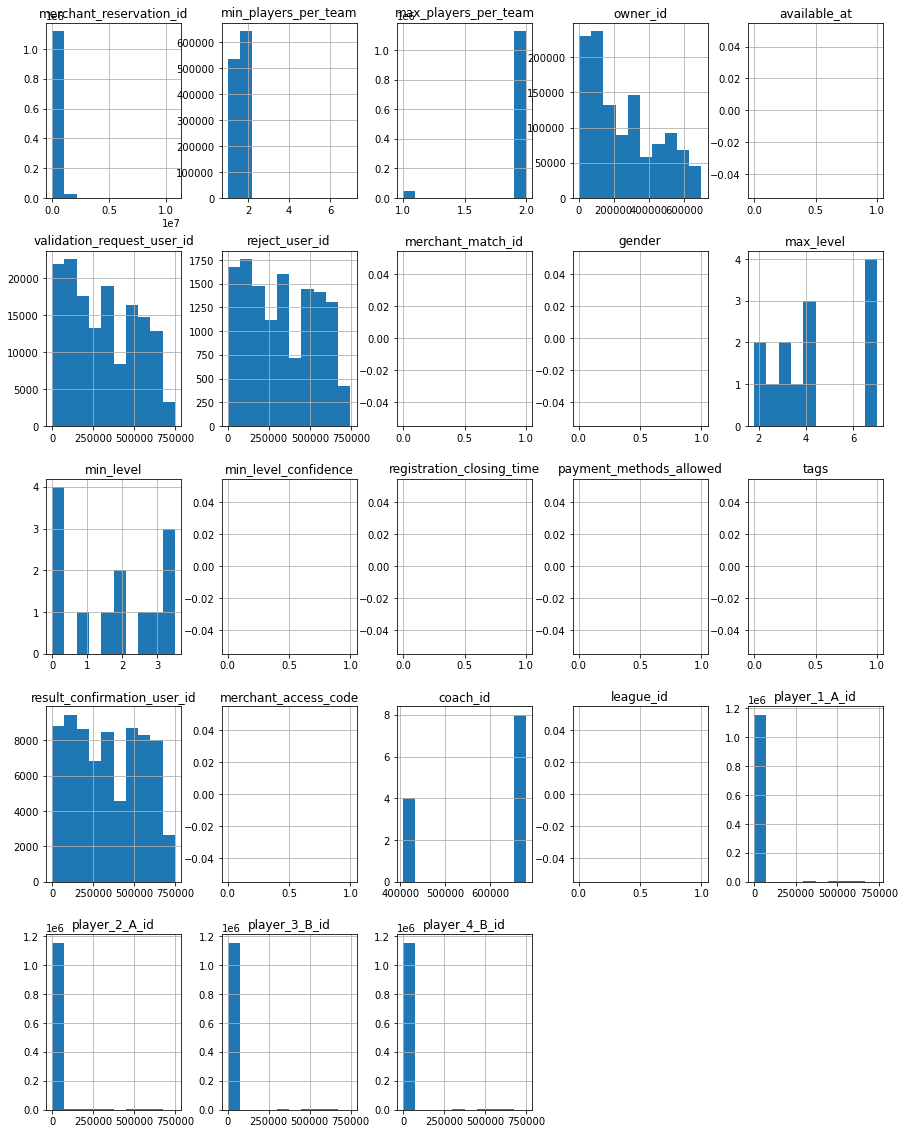

In [6]:
df.hist(figsize=(15,20))

In [7]:
print(" Printing histograms on each columns we can quickly see some null columns.\n Let's deep dive on each of them")

 Printing histograms on each columns we can quickly see some null columns.
 Let's deep dive on each of them


## Cleaning Nans

In [8]:
print("Let's drop some null columns")
missing_values_dataset = df.isnull().sum().reset_index().sort_values( by = 0 , ascending = False)
total = df.shape[0]
print(f"Total dataset length : {df.shape[0]}")
#display(missing_values_dataset.head(2))
missing_values_dataset["%_from_total"] = (missing_values_dataset[0] / total ) * 100
pd.set_option('display.max_rows', None)
display(missing_values_dataset)


#print(missing_values_dataset.columns.values.tolist())


Let's drop some null columns
Total dataset length : 1176711


,index,0,%_from_total
31,registration_closing_time,1176711,100.000000
53,league_id,1176711,100.000000
34,payment_methods_allowed,1176711,100.000000
30,min_level_confidence,1176711,100.000000
27,gender,1176711,100.000000
26,merchant_match_id,1176711,100.000000
17,available_at,1176711,100.000000
42,merchant_access_code,1176711,100.000000
35,tags,1176711,100.000000
52,coach_id,1176699,99.998980


In [9]:
thres = 80
print(f"We are keeping columns above {thres} % nans")

filter_nan_dataset =  missing_values_dataset[missing_values_dataset["%_from_total"]<thres]
Keeping_cols = filter_nan_dataset["index"]
print ( type (Keeping_cols[0]))
#print(f"We are keeping the following columns: {Keeping_cols}")
Cleaned_dataset = df[Keeping_cols]
Cleaned_dataset.shape
display(Cleaned_dataset.head(4))

We are keeping columns above 80 % nans
<class 'str'>


,price,resource_properties,cost_per_player,merchant_reservation_id,resource_id,player_4_B_id,player_3_B_id,player_2_A_id,reservation_id,max_players_per_team,tenant,resource_name,player_1_A_id,postcode,player_4_B,visibility,payment_required,location,sport_id,player_3_B,teams,player_2_A,min_players_per_team,player_1_A,owner_id,status,join_requests_info,product_type,registration_status,registration_type,match_origin,registration_info,is_playtomic_managed,game_status,results_status,results,start_date,end_date,match_type,match_id
0,NaN,"{'resource_type': 'indoor', 'resource_size': '...",28 EUR,79136.0,ce5f5bc0-73ba-4a60-8b67-5695d07d347b,0.0,0.0,0.0,4741ed63-2bed-4500-8e41-08218777d270,2.0,{'tenant_id': 'da778722-43b3-11e8-8674-5254004...,Pista 4,0.0,0,0,HIDDEN,False,Padel Kas,PADEL,0,"[{'team_id': '0', 'players': [{'name': 'Mario ...",0,2,0,534901,CANCELED,"{'status': 'CLOSED', 'requests': []}",CUSTOMER_MATCH,CLOSED,ANY,APP_ANDROID,"{'payment_type': 'SINGLE_PAYER', 'registration...",False,CANCELED,NOT_ALLOWED,"[{'name': 'Set-1', 'scores': []}, {'name': 'Se...",2020-10-18T10:30:00,2020-10-18T12:00:00,ANEMONE,a8ba2a3e-e69b-440a-a270-900568e77c85
1,5.88 EUR,"{'resource_type': 'outdoor', 'resource_size': ...",5.88 EUR,353714.0,70037be6-6ca2-40f2-8d72-578f1ada2e19,0.0,0.0,0.0,d370870d-04bb-49ee-8faf-1b55a80ab8b7,2.0,{'tenant_id': 'da75d80c-43b3-11e8-8674-5254004...,Muro12,0.0,0,0,HIDDEN,True,Parque Deportivo Puerta de Hierro,PADEL,0,"[{'team_id': '0', 'players': [{'name': 'Mario ...",0,2,0,534901,CONFIRMED,"{'status': 'CLOSED', 'requests': []}",CUSTOMER_MATCH,CLOSED,ANY,APP_ANDROID,"{'payment_type': 'SPLIT', 'registrations': [{'...",False,PLAYED,CONFIRMED,"[{'name': 'Set-1', 'scores': [{'team_id': '0',...",2020-10-05T18:00:00,2020-10-05T20:00:00,ANEMONE,044e602b-797e-424d-9076-7c3c5f8807b0
2,NaN,"{'resource_type': 'indoor', 'resource_size': '...",400 SEK,10455.0,683e011b-9906-4bcd-959d-ef1c994d38ed,0.0,0.0,0.0,e3d747a3-3349-473e-aba4-27cca048f0a8,2.0,{'tenant_id': 'cb52b8c3-d030-42a7-bd98-ac40714...,Bana 4,0.0,0,0,HIDDEN,False,Padel Zenter Skövde,PADEL,0,"[{'team_id': '0', 'players': [{'name': 'Cathri...",0,2,0,481137,EXPIRED,"{'status': 'CLOSED', 'requests': []}",CUSTOMER_MATCH,CLOSED,ANY,APP_IOS,"{'payment_type': 'SINGLE_PAYER', 'registration...",False,PLAYED,EXPIRED,"[{'name': 'Set-1', 'scores': []}, {'name': 'Se...",2020-08-29T10:30:00,2020-08-29T11:30:00,ANEMONE,48a8e386-d044-43f4-9ee2-2b54898555d5
3,NaN,"{'resource_type': 'indoor', 'resource_size': '...",600 DKK,20853.0,0e2552a6-e642-4725-827b-1b4822bfc574,0.0,0.0,0.0,706fb86b-2707-4bbe-835d-d104e14f57a4,2.0,{'tenant_id': 'bd28aa83-f4a0-4fd3-b7b3-9c94ec6...,Padel 5 - Copenhagen Grooming,0.0,0,0,HIDDEN,False,Racket Club CPH S,PADEL,0,"[{'team_id': '0', 'players': [{'name': 'Gustav...",0,2,0,549932,EXPIRED,"{'status': 'CLOSED', 'requests': []}",CUSTOMER_MATCH,CLOSED,ANY,WEB_DESKTOP,"{'payment_type': 'SINGLE_PAYER', 'registration...",False,PLAYED,EXPIRED,"[{'name': 'Set-1', 'scores': []}, {'name': 'Se...",2020-10-10T14:00:00,2020-10-10T16:00:00,ANEMONE,76a7ec97-b925-473c-8a9e-d113aa1a9834


In [10]:
print("There are certain columns that do not provide any valuable info , let's drop them as well")

colums_to_drop = ["player_4_B_id","player_3_B_id","player_2_A_id","player_1_A_id","player_4_B","player_1_A"]
cols = Cleaned_dataset.columns.values.tolist()

kept_cols =[]

for i in cols:
    if i not in colums_to_drop:
        kept_cols.append(i)
    else:
        pass
print(kept_cols)

There are certain columns that do not provide any valuable info , let's drop them as well
['price', 'resource_properties', 'cost_per_player', 'merchant_reservation_id', 'resource_id', 'reservation_id', 'max_players_per_team', 'tenant', 'resource_name', 'postcode', 'visibility', 'payment_required', 'location', 'sport_id', 'player_3_B', 'teams', 'player_2_A', 'min_players_per_team', 'owner_id', 'status', 'join_requests_info', 'product_type', 'registration_status', 'registration_type', 'match_origin', 'registration_info', 'is_playtomic_managed', 'game_status', 'results_status', 'results', 'start_date', 'end_date', 'match_type', 'match_id']


In [11]:
Cleaned_dataset =  Cleaned_dataset[kept_cols]

In [12]:
print(Cleaned_dataset.shape)

(1176711, 34)


In [13]:
Cleaned_dataset["start_date"].max()

'2022-08-01T15:30:00'

In [14]:
Cleaned_dataset["start_date"].min()

'2014-01-07T15:30:00'

## Cleaning by date

In [15]:
#transforming date from string to datetime value
df['start_date']= pd.to_datetime(df['start_date'], format=  "%Y/%m/%d" , yearfirst= True , utc = False)
df["start_date"] = df['start_date'].dt.date
print( (df["start_date"][0]) )

2020-10-18


Most of the data is grouped between 2020 & 2021


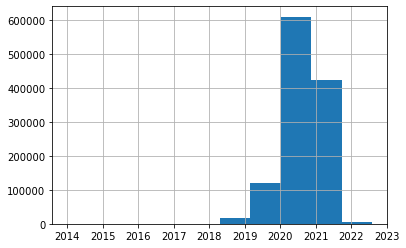

In [16]:
df["start_date"].hist()
print("Most of the data is grouped between 2020 & 2021")

In [17]:
print("Grouping data by starting year so we make a decision on whether to keep all data")
Cleaned_dataset['start_date_year'] = pd.to_datetime(Cleaned_dataset['start_date']).dt.to_period('Y')

#print(type (df['start_date'][0]))
#print( df['start_date'][0].year )

Grouping data by starting year so we make a decision on whether to keep all data


/home/jc/miniconda3/envs/jupyter_env/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [18]:
groupby_start_date = Cleaned_dataset.groupby(["start_date_year"])["match_id"].count().reset_index().sort_values( by = "match_id" , ascending= False)
groupby_start_date["%_from_total"] = (groupby_start_date["match_id"] /  groupby_start_date["match_id"].sum() ) * 100
display(groupby_start_date)

print(" 77 % of data is grouped on 2020 , let's only keep the analysis on that year")

,start_date_year,match_id,%_from_total
3,2020,909997,77.333942
4,2021,134485,11.428890
2,2019,123567,10.501049
1,2018,8520,0.724052
5,2022,141,0.011983
0,2014,1,0.000085


 77 % of data is grouped on 2020 , let's only keep the analysis on that year


In [19]:
Cleaned_dataset.head(2)
print( type (Cleaned_dataset["start_date_year"][0]))

<class 'pandas._libs.tslibs.period.Period'>


In [20]:
print("As aresult , we are keeping 2020 data")

#display (Cleaned_dataset["start_date_year"])
Cleaned_dataset= Cleaned_dataset[Cleaned_dataset["start_date_year"] == "2020"]
print(Cleaned_dataset.shape)

As aresult , we are keeping 2020 data
(909997, 35)


## Cleaning by sport

In [21]:
print("We are just interested in padel but it is interesting understading what is the padel weight over the total")
print( f'Printing unique sports from dataset:{df["sport_id"].unique()}')

We are just interested in padel but it is interesting understading what is the padel weight over the total
Printing unique sports from dataset:['PADEL' 'TENNIS' 'SQUASH' 'FOOTBALL_OTHERS' 'PADBOL' 'BADMINTON'
 'FOOTBALL7' 'FUTSAL']


In [22]:
print("Undestanding what is the most played sport")
groupby_sport = Cleaned_dataset.groupby(["sport_id"])["match_id"].count().reset_index()
groupby_sport["%_from_total"] =  (groupby_sport["match_id"] /  groupby_sport["match_id"].sum() ) * 100
display(groupby_sport.sort_values( by = "%_from_total" , ascending = False))

Undestanding what is the most played sport


,sport_id,match_id,%_from_total
5,PADEL,791916,87.024023
7,TENNIS,106687,11.723885
6,SQUASH,6871,0.755057
0,BADMINTON,1875,0.206045
4,PADBOL,1239,0.136154
2,FOOTBALL_OTHERS,850,0.093407
1,FOOTBALL7,431,0.047363
3,FUTSAL,128,0.014066


In [23]:
alpha = groupby_sport[groupby_sport["sport_id"]== 'PADEL']
display(alpha)
print(alpha["match_id"].sum())

,sport_id,match_id,%_from_total
5,PADEL,791916,87.024023


791916


In [24]:
print("Padel is the most played sport on the dataset. Let's filter the dataset by Padel")
Cleaned_dataset_padel = Cleaned_dataset[Cleaned_dataset["sport_id"] == 'PADEL']
print(f"New dataset shape = {Cleaned_dataset_padel.shape}")

Padel is the most played sport on the dataset. Let's filter the dataset by Padel
New dataset shape = (791916, 35)


## Cleaning by match status

In [25]:
print("The dataset is mainly focused on padel and tennis")

The dataset is mainly focused on padel and tennis


In [26]:
groupby_sport_match_status = Cleaned_dataset_padel.groupby(["sport_id","game_status","status"])["match_id"].count().reset_index()
groupby_sport_match_status["%_from_total"] = (groupby_sport_match_status["match_id"] /  groupby_sport_match_status["match_id"].sum() ) * 100
display(groupby_sport_match_status)
print(f"Total games booked on 2020 :{ groupby_sport_match_status['match_id'].sum()} (add to the cart measurement)")
print("During 2020 , 80% of the games booked were finally played.(success rate) ")
print(f"However, { (493438 / (121888+493438+33348+3)) * 100} % of the played games were expired. This means that X % did not clik finalise on the app")



,sport_id,game_status,status,match_id,%_from_total
0,PADEL,CANCELED,CANCELED,143239,18.087651
1,PADEL,PLAYED,CONFIRMED,121888,15.391531
2,PADEL,PLAYED,EXPIRED,493438,62.309386
3,PADEL,PLAYED,PLAYED,33348,4.211053
4,PADEL,PLAYED,VALIDATING,3,0.000379


Total games booked on 2020 :791916 (add to the cart measurement)
During 2020 , 80% of the games booked were finally played.(success rate) 
However, 76.06836684513247 % of the played games were expired. This means that X % did not clik finalise on the app


In [27]:
print("Expired example")
example = (Cleaned_dataset_padel [ (Cleaned_dataset_padel["game_status"] == 'PLAYED') & (Cleaned_dataset_padel["status"]== 'EXPIRED')]) 
display (example.head(5))
print("It caught my eye that there are diffent currencies which means there are different countries in the analysis")

Expired example


,price,resource_properties,cost_per_player,merchant_reservation_id,resource_id,reservation_id,max_players_per_team,tenant,resource_name,postcode,visibility,payment_required,location,sport_id,player_3_B,teams,player_2_A,min_players_per_team,owner_id,status,join_requests_info,product_type,registration_status,registration_type,match_origin,registration_info,is_playtomic_managed,game_status,results_status,results,start_date,end_date,match_type,match_id,start_date_year
2,NaN,"{'resource_type': 'indoor', 'resource_size': '...",400 SEK,10455.0,683e011b-9906-4bcd-959d-ef1c994d38ed,e3d747a3-3349-473e-aba4-27cca048f0a8,2.0,{'tenant_id': 'cb52b8c3-d030-42a7-bd98-ac40714...,Bana 4,0,HIDDEN,False,Padel Zenter Skövde,PADEL,0,"[{'team_id': '0', 'players': [{'name': 'Cathri...",0,2,481137,EXPIRED,"{'status': 'CLOSED', 'requests': []}",CUSTOMER_MATCH,CLOSED,ANY,APP_IOS,"{'payment_type': 'SINGLE_PAYER', 'registration...",False,PLAYED,EXPIRED,"[{'name': 'Set-1', 'scores': []}, {'name': 'Se...",2020-08-29T10:30:00,2020-08-29T11:30:00,ANEMONE,48a8e386-d044-43f4-9ee2-2b54898555d5,2020
3,NaN,"{'resource_type': 'indoor', 'resource_size': '...",600 DKK,20853.0,0e2552a6-e642-4725-827b-1b4822bfc574,706fb86b-2707-4bbe-835d-d104e14f57a4,2.0,{'tenant_id': 'bd28aa83-f4a0-4fd3-b7b3-9c94ec6...,Padel 5 - Copenhagen Grooming,0,HIDDEN,False,Racket Club CPH S,PADEL,0,"[{'team_id': '0', 'players': [{'name': 'Gustav...",0,2,549932,EXPIRED,"{'status': 'CLOSED', 'requests': []}",CUSTOMER_MATCH,CLOSED,ANY,WEB_DESKTOP,"{'payment_type': 'SINGLE_PAYER', 'registration...",False,PLAYED,EXPIRED,"[{'name': 'Set-1', 'scores': []}, {'name': 'Se...",2020-10-10T14:00:00,2020-10-10T16:00:00,ANEMONE,76a7ec97-b925-473c-8a9e-d113aa1a9834,2020
5,NaN,"{'resource_type': 'indoor', 'resource_size': '...",20 EUR,202347.0,9609de2d-147d-400b-acb6-1461c9e8aecb,7648e4f7-9fab-47d9-9bec-d941a586c929,2.0,{'tenant_id': 'da7690b5-43b3-11e8-8674-5254004...,Pista 10-VERDE,0,HIDDEN,False,Club Deportivo iPadel,PADEL,0,"[{'team_id': '0', 'players': [{'name': 'Pablo ...",0,2,598293,EXPIRED,"{'status': 'CLOSED', 'requests': []}",CUSTOMER_MATCH,CLOSED,ANY,APP_IOS,"{'payment_type': 'SINGLE_PAYER', 'registration...",False,PLAYED,EXPIRED,"[{'name': 'Set-1', 'scores': []}, {'name': 'Se...",2020-11-22T11:30:00,2020-11-22T13:00:00,ANEMONE,4233e75b-c2b6-4663-9a77-5282102f7a07,2020
7,26 EUR,NaN,26 EUR,35310.0,6c712d57-cc5e-452c-b120-0a55fbf3a5a1,f3ae9d1b-1002-4abc-b5c9-e1d11cbe025c,2.0,{'tenant_id': 'e15d846f-eb49-4723-aa46-b2a7c09...,Padel 1 Gazpi,0,HIDDEN,False,Arena Entrena Padel,PADEL,0,"[{'team_id': '0', 'players': [{'name': 'MIGUEL...",0,1,320061,EXPIRED,"{'status': 'CLOSED', 'requests': []}",CUSTOMER_MATCH,CLOSED,ANY,SYLTEKCRM,"{'payment_type': 'SINGLE_PAYER', 'registration...",False,PLAYED,EXPIRED,"[{'name': 'Set-1', 'scores': []}, {'name': 'Se...",2020-12-30T08:00:00,2020-12-30T09:30:00,ANEMONE,97b082d1-532c-456f-82ba-82e24a1eb07c,2020
9,NaN,"{'resource_type': 'outdoor', 'resource_size': ...",15 EUR,189807.0,5c530a93-0dfe-488d-8404-74a4a5e1621d,4b9c29f7-8fa5-4010-9509-61f16fd0a747,2.0,{'tenant_id': 'da77e224-43b3-11e8-8674-5254004...,Padel 8,0,HIDDEN,False,Club Deportivo Somontes,PADEL,0,"[{'team_id': '0', 'players': [{'name': 'Jorge ...",0,2,107750,EXPIRED,"{'status': 'CLOSED', 'requests': []}",CUSTOMER_MATCH,CLOSED,ANY,APP_IOS,"{'payment_type': 'SINGLE_PAYER', 'registration...",False,PLAYED,EXPIRED,"[{'name': 'Set-1', 'scores': []}, {'name': 'Se...",2020-09-05T17:00:00,2020-09-05T18:30:00,ANEMONE,94e94f32-31c4-43ce-90dd-c62ac98cb4df,2020


It caught my eye that there are diffent currencies which means there are different countries in the analysis


In [28]:
Cleaned_dataset_padel['tenant'] = Cleaned_dataset_padel['tenant'].apply(ast.literal_eval)

/home/jc/miniconda3/envs/jupyter_env/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [29]:
print(type(Cleaned_dataset_padel['tenant'][0]))

<class 'dict'>


In [30]:
Cleaned_dataset_padel['tenant'][0]["address"]['country']

'España'

In [ ]:
# Let's create an auxiliar table with all the tenants and then join it to the cleaned dataset

## Country analysis

In [32]:
# auxiliar table with all clubs and countries

## let's create an empty list with all indexes

print(Cleaned_dataset_padel.shape)
print(len(Cleaned_dataset_padel["match_id"]))

(791916, 35)
791916


for i in range (len(Cleaned_dataset_padel["match_id"])):
    display(pd.json_normalize(Cleaned_dataset_padel['tenant'][0]))

In [33]:
print("To understand the where the match was played , we have to get the location data from the tenat. Below you can see how I got that info using the request library")

To understand the where the match was played , we have to get the location data from the tenat. Below you can see how I got that info using the request library


In [34]:


def get_tentants_id():
    lista_ids_tenants = []
    for i in range (len(Cleaned_dataset_padel["match_id"])): # (len(Cleaned_dataset_padel["match_id"]))

        try : 

            #print(f"-------------iteracion {i}-------------")
            #display (pd.json_normalize(Cleaned_dataset_padel['tenant'][i]) )
            a = pd.json_normalize(Cleaned_dataset_padel['tenant'][i]) 
            id_tenant = a["tenant_id"][0]
            #print(id_tenant)
            if id_tenant not in lista_ids_tenants:
                lista_ids_tenants.append(id_tenant)

            else:
                #print(f"{id_tenant} ya está")
                pass


        except :
            #print(f"{i} da error")
            #display(a)
            pass



In [35]:
#print(f"Lista de ids : {lista_ids_tenants} ")

In [36]:
%store -r comp

In [37]:
def get_tenants_data(lista_ids_tenants):
    import requests
    import os
    import requests
    import pandas as pd
    import os
    from datetime import date, timedelta, datetime
    import glob

    for i in lista_ids_tenants:
            print(f"------------tenant = {id}--------------")

            # print("------------------")
            # print(f"Page : {page}")
            response = requests.get(f'https://{comp}.io/api/v1/tenants/{i}' ) # comp is a variable stored on other doc
            dataset = response.json()
            data = pd.json_normalize(dataset)
            #display(data)
            mainpath = f"/home/jc/Desktop/Padel_2021/Temp_tables/tenants_data/"
            filename =f'tenant_data_{i}' 
            fullpath = os.path.join(mainpath, filename)
            data.to_csv(fullpath+".csv", index=False)
            print("Merging all rows on 1 dataset")
           
            today = date.today()
            print("Merge stage")
            path = f'/home/jc/Desktop/Padel_2021/Temp_tables/tenants_data/'  # use your path
            all_files = glob.glob(path + "/*.csv")

            #print(all_files)
            print("Merging....")
            li = []

            for filename in all_files:
                df = pd.read_csv(filename, index_col=None, header=0)
                li.append(df)
            #print(li)
            frame = pd.concat(li, axis=0, ignore_index=True)
            today = date.today()
            mainpath = f"/home/jc/Desktop/Padel_2021/Final_tables/"
            filename = f'data_tenants_{today}'
            fullpath = os.path.join(mainpath, filename)
            frame.to_csv(fullpath + ".csv", index=False)

            print(f"Process finalised, fullpath: {fullpath}")

     
    

In [38]:
print("See here the list of tentants ids if you do not want to execute the previous function")
lista_ids_tenants = ['da778722-43b3-11e8-8674-52540049669c', 'da75d80c-43b3-11e8-8674-52540049669c', 'cb52b8c3-d030-42a7-bd98-ac40714f31b0', 'bd28aa83-f4a0-4fd3-b7b3-9c94ec63485b', 'da7690b5-43b3-11e8-8674-52540049669c', 'e15d846f-eb49-4723-aa46-b2a7c0999166', 'da77e224-43b3-11e8-8674-52540049669c', '41aed65c-7f0e-4b6c-983c-d87d87d4f535', '2fb6278f-cd46-4102-82e7-6bb7e82aa76b', 'f23c4126-7629-4f95-901d-4c29ee99d0ea', '20cc7c74-f12b-476f-8ca1-a6457c25f578', 'da7c8ff6-43b3-11e8-8674-52540049669c', '939e68a9-bc4d-4b77-aae3-096932463577', 'da7aaac2-43b3-11e8-8674-52540049669c', 'da7bcb78-43b3-11e8-8674-52540049669c', 'da77b04c-43b3-11e8-8674-52540049669c', 'da7b800f-43b3-11e8-8674-52540049669c', '697746d5-8f6b-4825-9c09-bee125423dcb', 'da7887db-43b3-11e8-8674-52540049669c', 'da78dd3c-43b3-11e8-8674-52540049669c', '28b627b5-7c7a-42f9-b1f8-4dd425ae597e', '63cfe37c-5584-436d-a41c-a0861a2bc112', 'da7cb23b-43b3-11e8-8674-52540049669c', '31f6c784-8e90-4157-b372-0e11c33aea2f', 'ae00c68c-46e3-4ad0-99e3-86c6b25cdd97', '11a6c5f1-79f6-42fc-a62b-54e347d0b0fa', '709bf1df-c2ae-477e-a3c1-d7b98bd4f435', '2f30bde8-9cee-411b-93d4-d3a487884d35', 'd28ba567-08e6-4112-b7e9-94bcd6f37446', 'da7bbf6a-43b3-11e8-8674-52540049669c', '618d8202-788b-429e-9a57-4cbd4e0b9144', 'f8c7a1c8-7339-4c67-9a88-d93b807f63f9', '2b413f4a-16f8-466a-888a-2b96be878d00', '491009ef-bd4d-4b66-b55f-bca061460af1', 'da7bc972-43b3-11e8-8674-52540049669c', '7eb7e813-af3e-4f72-9b0c-a55aefc55607', 'da7cabd8-43b3-11e8-8674-52540049669c', 'e5a27fc5-1c54-4ff4-a871-5341ae03973a', 'b69fbeb2-7c6b-480f-b307-0b99818c1c14', 'e20925be-7d3e-4246-b85d-4f3cc92b82fc', '4b347df0-69a9-4b5f-8aa5-5442b09334d0', 'da78a939-43b3-11e8-8674-52540049669c', 'da77e9de-43b3-11e8-8674-52540049669c', 'bfaaaaf4-881f-4906-aca9-0d32e6700f11', 'da7aefd9-43b3-11e8-8674-52540049669c', '4739d8b8-41e0-499a-9eda-b7d6e658e29b', 'da793772-43b3-11e8-8674-52540049669c', 'da788d2c-43b3-11e8-8674-52540049669c', 'da78c64b-43b3-11e8-8674-52540049669c', 'da791110-43b3-11e8-8674-52540049669c', '84035c44-106c-4234-b280-f96c2a323d91', 'da778af0-43b3-11e8-8674-52540049669c', 'da76fff9-43b3-11e8-8674-52540049669c', '75cbf925-a0c3-41b2-ad27-f173a656f7ea', 'da7a447f-43b3-11e8-8674-52540049669c', '0d31682c-72d8-11e8-8674-52540049669c', '98e6583b-0ba1-4f15-8129-720205de3f4e', 'da7b3625-43b3-11e8-8674-52540049669c', 'da790387-43b3-11e8-8674-52540049669c', 'ecf6508d-19d7-4829-a778-a663f91b0ebb', 'e754efb4-f44c-448a-8d6a-91c52a3167f3', 'da76a551-43b3-11e8-8674-52540049669c', 'ae5d5103-2f0e-42c1-a98e-742327f511ea', 'da776daf-43b3-11e8-8674-52540049669c', 'd7011f90-35db-47f3-a6c0-3e21e7a31cf3', '777e756c-b5b7-4946-acb4-ecbdd33d685f', 'da77e5f8-43b3-11e8-8674-52540049669c', '92415b74-56b4-49a9-a7b2-a46dd199abfc', 'da77f2bf-43b3-11e8-8674-52540049669c', 'da75f577-43b3-11e8-8674-52540049669c', 'ee7cfde3-1f8e-4cfa-be57-3a6edf3f2cd0', 'da768b19-43b3-11e8-8674-52540049669c', 'da79175c-43b3-11e8-8674-52540049669c', '35d7d876-aa4f-4915-b60d-e54cf23806b8', '03c2dd5f-2ae7-414f-8b03-72b0aa84b613', '7664528f-a043-41dc-bab3-80cc5401656d', '52975c2c-9571-4454-a3ad-51829a7a0c54', 'da774ee5-43b3-11e8-8674-52540049669c', 'da7718de-43b3-11e8-8674-52540049669c', '269effa4-91fd-47bd-8f62-b33d810db698', 'da793391-43b3-11e8-8674-52540049669c', 'da786525-43b3-11e8-8674-52540049669c', 'da79548a-43b3-11e8-8674-52540049669c', 'c57e74a1-f236-4943-8e8f-31bcf54cff18', '8b498fcc-37cf-4a00-95ba-8d4038f801f5', '06f213c5-ac2d-449a-b26f-f7c926b27710', '9f1a1dd4-55e5-4aba-a6bc-fd3b3e45339a', 'da76537a-43b3-11e8-8674-52540049669c', 'b3308860-b36d-4a96-ae97-0260931f4157', 'da77e042-43b3-11e8-8674-52540049669c', 'da766fd6-43b3-11e8-8674-52540049669c', 'da776baf-43b3-11e8-8674-52540049669c', 'c6be2d3f-269d-4227-9012-e493cb8405f1', 'da773019-43b3-11e8-8674-52540049669c', 'da78a74a-43b3-11e8-8674-52540049669c', 'da7a5d54-43b3-11e8-8674-52540049669c', 'a60db3c8-47ce-4acc-a67c-d662100ddb46', 'da7a0347-43b3-11e8-8674-52540049669c', 'b9c28ca5-9def-4979-97f0-ee4d6fcd5ec2', '25530db2-89f0-40cb-900f-fa67f8bcac23', '366d2a0f-0de3-4b0f-98ce-0dc5dfa1bbc2', 'da7c7730-43b3-11e8-8674-52540049669c', 'c20fc5a3-eff2-43a9-b53d-b61727625033', 'da77097f-43b3-11e8-8674-52540049669c', 'da77f814-43b3-11e8-8674-52540049669c', 'cf68dc0c-a11f-42f2-8740-f245cb47049f', 'b8741de6-41f8-404e-918e-4de58fd13e00', 'f5430b4e-df77-4b93-8d98-9ab94f58c2cd', 'da796188-43b3-11e8-8674-52540049669c', 'da78253b-43b3-11e8-8674-52540049669c', 'da7b9285-43b3-11e8-8674-52540049669c', '5edeb94e-6846-43cc-aae8-c8883bb42c65', '8891f4e0-2ad3-4a5a-8baa-bedc87ae85ba', 'da766c17-43b3-11e8-8674-52540049669c', 'da77e7ee-43b3-11e8-8674-52540049669c', 'da7625b6-43b3-11e8-8674-52540049669c', 'ab14e970-d2bb-472e-89ee-30f6e65a1d19', 'c44867e3-65ff-4250-868a-1338dffac9d6', '6630cd2c-b4b0-4974-af88-3b55bc033e85', '17a13ee4-2d0c-438e-978e-56efe5ec4948', 'dcb9aa8f-22e5-4e1d-8324-97ffa4edd74d', '01c1186e-daae-4ba2-a2ae-b199561e4cc5', 'da7819ce-43b3-11e8-8674-52540049669c', 'da7acf3a-43b3-11e8-8674-52540049669c', '47c18853-f02b-4e64-8814-41875a3fa0f9', '8ae041a0-1b84-4703-a095-4ec3a2d264a4', '1c7bab17-5899-4813-aadb-49b8c8e8aee0', 'da7bcf77-43b3-11e8-8674-52540049669c', '157bfda2-aba9-438a-94b2-f6f06ea33d66', 'da796757-43b3-11e8-8674-52540049669c', 'da77a474-43b3-11e8-8674-52540049669c', '84cb00be-3c06-4649-b563-62437c4520cf', 'da769af8-43b3-11e8-8674-52540049669c', 'da77a256-43b3-11e8-8674-52540049669c', 'da793f04-43b3-11e8-8674-52540049669c', 'da792d85-43b3-11e8-8674-52540049669c', '9c6dc857-e11d-4aaa-b8e2-9a00ea416ef9', '5ae381c5-54df-4ecb-8f89-9f5c5d8958e8', 'da7ccdf4-43b3-11e8-8674-52540049669c', 'e9659cb6-cdb4-4736-ba3b-b68136b1a850', '65df2bc6-ff13-4f6d-a328-f92527bee2e5', 'da77ed84-43b3-11e8-8674-52540049669c', 'da7b3fa0-43b3-11e8-8674-52540049669c', '18caeccc-842a-4b73-beb9-50c028149399', '8ece5d30-5cc9-4f7c-9341-8add6314f0a5', 'da7698de-43b3-11e8-8674-52540049669c', 'af1bc717-590e-11e8-8674-52540049669c', 'da78c24c-43b3-11e8-8674-52540049669c', '62d0d457-fa3e-4da0-a0e8-6546e941e85d', 'da7a5362-43b3-11e8-8674-52540049669c', '10c55b34-c12f-4dd7-b6d4-600626562879', 'eb5afd6d-bd79-4d88-8e8c-275c6f468fd7', '3925b4dd-bf03-4527-92d7-a33b55f98ceb', '80e8ba8c-2796-4d60-b8dc-1fb561361316', 'da780a43-43b3-11e8-8674-52540049669c', '85a9f698-73be-45e0-9c52-f06745fc17d3', '34fd53a2-5d29-4b3b-b35d-e85b6d757da0', 'da7cade4-43b3-11e8-8674-52540049669c', 'da78cee3-43b3-11e8-8674-52540049669c', 'da774741-43b3-11e8-8674-52540049669c', 'da78df2a-43b3-11e8-8674-52540049669c', '5965fb96-5eab-4e26-ac09-7a183500a27d', '71680211-d906-4809-9434-18d4f5e136ff', '815b359e-c851-4da7-a5b3-034b0ad07c9e', 'da77fff9-43b3-11e8-8674-52540049669c', 'da7ab727-43b3-11e8-8674-52540049669c', 'da778317-43b3-11e8-8674-52540049669c', 'da773efc-43b3-11e8-8674-52540049669c', 'da7a3474-43b3-11e8-8674-52540049669c', '2698b179-57ca-46c0-9856-932b274182d4', '80999537-e2f7-454a-8b28-1cf00c251fb7', '4b0dc6f7-0fa5-436e-80a4-6d85aa37a201', 'da79432e-43b3-11e8-8674-52540049669c', '0fe9d639-09e7-484a-97fc-fbac716a0f38', 'dcf8adc2-6191-4366-9aae-48da7527dade', '3ffcc52a-54b1-4360-ab33-cbb02d0b276d', 'da77ca4d-43b3-11e8-8674-52540049669c', 'da77b884-43b3-11e8-8674-52540049669c', 'da768728-43b3-11e8-8674-52540049669c', 'da768559-43b3-11e8-8674-52540049669c', 'da7ca13c-43b3-11e8-8674-52540049669c', '976ff423-d41d-41b3-8ac9-f65658567f93', 'a246e828-99cf-4e35-9777-107067eb774f', '6c2d6284-6fac-4354-aaba-885650e3e159', '1af8cecd-27cd-4681-9777-51a5d6a5e983', 'da766e04-43b3-11e8-8674-52540049669c', 'a887f28b-16b8-4db0-a050-75ab5c8ea636', 'da7b2e94-43b3-11e8-8674-52540049669c', 'da770b57-43b3-11e8-8674-52540049669c', 'da7a9076-43b3-11e8-8674-52540049669c', 'da76ab6d-43b3-11e8-8674-52540049669c', '3f1265f5-ef1c-4db1-a14b-f55b8c827f68', 'da7a29bd-43b3-11e8-8674-52540049669c', 'da7c9293-43b3-11e8-8674-52540049669c', 'da7c8c09-43b3-11e8-8674-52540049669c', '3ae08302-f440-495a-a642-0d2323f78124', 'cc88fee1-0d59-4606-8291-5671c0277de8', '62d77673-ad1a-453a-a36f-5dfe69e0249c', 'da78d77a-43b3-11e8-8674-52540049669c', 'da7c7d20-43b3-11e8-8674-52540049669c', 'c988f371-c52c-4996-b696-95ca02f73ab6', 'da7a48e1-43b3-11e8-8674-52540049669c', '6f48fe2b-6b35-482b-849c-88c03eca612b', 'da782172-43b3-11e8-8674-52540049669c', 'da781f98-43b3-11e8-8674-52540049669c', 'da7ba4e6-43b3-11e8-8674-52540049669c', 'da7b81f9-43b3-11e8-8674-52540049669c', 'da7909a1-43b3-11e8-8674-52540049669c', '9a309325-3da6-4284-b46e-107b51f9f167', 'c73b9375-d993-4b1b-9ecd-a7ff5550d886', '7cf39948-64fc-451f-b410-810714f52ea4', '962b4f9a-56e7-4285-9a17-9b2808db6435', 'da795d8b-43b3-11e8-8674-52540049669c', 'da789ac8-43b3-11e8-8674-52540049669c', '0e8639b5-04bf-481d-85a2-df44fcdf129c', 'f34b0158-b946-4f67-83bd-458afd20714b', 'da7c8dfc-43b3-11e8-8674-52540049669c', '5f0626d1-3562-4e92-a8fb-1e8a8ca95ab7', '6d7e509b-f925-4d09-9eeb-934a3b009465', 'da77ae8a-43b3-11e8-8674-52540049669c', 'c17a30be-a860-48c0-83cb-6ce0503fc617', 'da785b1b-43b3-11e8-8674-52540049669c', 'bf72deaf-3251-4328-9b63-df7046e449f6', 'cbeafecc-8530-4089-9e81-f99dc028c2c9', 'f3af55de-1491-408f-9ca6-0ede06ad5ccd', 'c298e17c-a739-4d12-8e8e-31889580817d', 'da771acd-43b3-11e8-8674-52540049669c', 'c87bd9b1-d1d3-4115-ae9a-6781dc5b8c80', 'cd0b712e-5c80-4962-af77-8dbfc6ff1709', 'be164d25-4376-4f11-9b0f-1ca6fdf1007e', 'fd14bf40-fa39-4dd3-a9c4-739657f71d79', 'da76e6e7-43b3-11e8-8674-52540049669c', 'da78db44-43b3-11e8-8674-52540049669c', 'c823ac43-1420-451e-8fc7-1f1c40035324', '9b20e807-eee7-449a-8a31-8aa919f1e44a', '45fb174a-1703-4c85-b741-7717f80ba4d8', 'da78a4d6-43b3-11e8-8674-52540049669c', 'da7779a7-43b3-11e8-8674-52540049669c', 'da7980d1-43b3-11e8-8674-52540049669c', '39fb26f6-e816-41c8-8e3e-077ec92960c5', 'a7b79060-5e68-4477-943a-e0d733ed297d', 'a31aa327-b525-4b0b-a8cc-3dc976f9aae8', 'b7d5c716-4d61-4e8c-87a7-cc3a63c038ac', 'da7bc1ab-43b3-11e8-8674-52540049669c', 'da7885e9-43b3-11e8-8674-52540049669c', 'da7b535e-43b3-11e8-8674-52540049669c', 'da75cae3-43b3-11e8-8674-52540049669c', '0a0d4d8b-2313-46ab-9a2d-ba06bdc230ac', 'da78122f-43b3-11e8-8674-52540049669c', 'da77548d-43b3-11e8-8674-52540049669c', 'da765f8e-43b3-11e8-8674-52540049669c', '54208a67-448b-4779-bd8d-5449df5ab80e', '93984c09-7989-496c-a0a6-c1e806fbf968', '0f598327-b6dd-43ae-9afa-0ec42db52738', 'da785914-43b3-11e8-8674-52540049669c', '8902d1bb-4725-4f33-8693-d6e2601ab92b', '821f25c8-be45-4af5-ad05-8899cd3fff41', '8ce467f9-504f-40c7-8582-94bd786e9d18', '9da48f66-63c4-42f0-aac2-2270d673cf16', 'da76d9d4-43b3-11e8-8674-52540049669c', 'b1041808-64d3-448a-8f23-64dcf52267b0', 'acb6e55d-58f6-4153-9796-c431f549129d', 'da78c87d-43b3-11e8-8674-52540049669c', 'da766749-43b3-11e8-8674-52540049669c', '850f99fd-3f8c-4ce0-a64a-4e4d915ac1f6', 'ba9212f7-a9eb-4402-8a1a-715558ff3141', 'a10585df-46cb-11e8-8674-52540049669c', 'fa449bb4-6779-49f1-8652-07f0638673e0', 'ae8b56e6-6cc0-4b65-bee4-b0d99da3d029', '7dfc45b4-7d8d-400d-b361-6684655bdcab', '7b738a3b-9d12-4b6f-8c8a-83b579b83bc9', '85897862-3e7a-4a24-a855-3651d4a58a65', '2e09fe90-2c1b-462d-851d-f298d29dc263', '29d01a19-b59f-49b9-b273-ed16d424cdf4', 'da76d407-43b3-11e8-8674-52540049669c', '789011d5-b429-4a4e-a740-32e11254353b', '13e754d2-0d41-41b1-979c-266b20dd1897', '064a9992-0465-47e4-a263-bf6207d9cc1b', 'da79708c-43b3-11e8-8674-52540049669c', 'da75cd50-43b3-11e8-8674-52540049669c', '994b90a6-250b-463f-947d-a1dd6f541a2c', 'e13b09fd-f623-4152-99f9-52b6668ddc5d', 'da79229c-43b3-11e8-8674-52540049669c', 'da760551-43b3-11e8-8674-52540049669c', 'd923052f-4771-4476-9043-577e787cb7af', 'f9497971-ee4b-4c80-95d4-742229424480', '23c278f4-47c5-11e8-8674-52540049669c', 'afc75605-2762-4c9d-a153-ed28b0fc7d9a', 'da792929-43b3-11e8-8674-52540049669c', 'da7abf67-43b3-11e8-8674-52540049669c', 'ac846ef7-2182-46d5-ba86-d79e0a3bfc16', 'fd7047eb-f23d-4e52-b9cd-45c0a02daaba', '53b9309c-fe1f-422d-91b3-530e2115af41', 'da76cbee-43b3-11e8-8674-52540049669c', '9ee01fa2-2699-478a-af84-d7f389ff8f77', 'da7a27bb-43b3-11e8-8674-52540049669c', 'da76e52e-43b3-11e8-8674-52540049669c', '231100a9-746c-4533-a01c-a65a0fda2507', '22432589-df17-4652-8c1e-321f8f912fda', 'da7982c6-43b3-11e8-8674-52540049669c', '61c2cf4e-5aca-4c00-a712-e9e9aa5e8383', '73d2029e-7e94-11e8-8674-52540049669c', 'da781611-43b3-11e8-8674-52540049669c', 'da796ea7-43b3-11e8-8674-52540049669c', 'da762dbe-43b3-11e8-8674-52540049669c', 'da7b4f1c-43b3-11e8-8674-52540049669c', 'da764fc7-43b3-11e8-8674-52540049669c', '7a28ce18-a059-46a2-a73b-088bddc11ea1', 'da77c69a-43b3-11e8-8674-52540049669c', '38876517-2022-432a-b258-ba1a5c4765b6', 'da78b46c-43b3-11e8-8674-52540049669c', 'da760778-43b3-11e8-8674-52540049669c', 'da7a09cb-43b3-11e8-8674-52540049669c', 'da7705ca-43b3-11e8-8674-52540049669c', '996f8c25-8d2e-486c-ab9b-6336112089eb', 'da766161-43b3-11e8-8674-52540049669c', 'da78cd1e-43b3-11e8-8674-52540049669c', 'da7bb58b-43b3-11e8-8674-52540049669c', 'da75d318-43b3-11e8-8674-52540049669c', '53a7e7b2-5a56-4159-ba77-9d99d61e5e68', 'da7bad5c-43b3-11e8-8674-52540049669c', 'da77b280-43b3-11e8-8674-52540049669c', '9f1f2bb7-5a08-4a52-8bd0-6c23d96c1568', '4e8a164d-bc7b-4b5d-a550-c8cb97906b0e', 'da78d94c-43b3-11e8-8674-52540049669c', '2374d1b0-2cae-46c8-af7f-d585f33b736c', 'da7894e6-43b3-11e8-8674-52540049669c', 'da78a0cf-43b3-11e8-8674-52540049669c', 'da77dc9f-43b3-11e8-8674-52540049669c', '3fb4fb08-6c45-478f-8e1e-4a67660560f0', 'dfe2fcf7-56f5-445e-9b2d-dd2389e0b9d5', 'da787bf3-43b3-11e8-8674-52540049669c', 'c3daa1ac-0f7d-4f1f-9475-01d32ee79679', '4a26a5e0-cdab-46ff-a7e6-10906558113f', '74072cda-4a8a-4abd-8549-515619dae53e', 'da7bc76f-43b3-11e8-8674-52540049669c', 'da786303-43b3-11e8-8674-52540049669c', '78ece970-cf4b-40cb-97e7-995b561fcae0', '7f88291a-8911-11e8-8674-52540049669c', '904c705d-c0fa-44c5-91fc-963778ba8a00', '14866c24-7a38-493d-a9b6-cd2815968c24', 'da786adb-43b3-11e8-8674-52540049669c', 'c2972a79-2ebc-4f9d-83e3-2bb45a37d89d', '31b48335-d2c8-456e-957e-57ccc09f7ef1', 'da77145e-43b3-11e8-8674-52540049669c', 'da7b7bc7-43b3-11e8-8674-52540049669c', 'da7a3890-43b3-11e8-8674-52540049669c', 'e570c31d-bbca-457b-b1ac-0ba49a32eed8', 'a6ad7efd-37a8-4c3e-9108-16d3fb3938b4', 'da7880e9-43b3-11e8-8674-52540049669c', 'da77128b-43b3-11e8-8674-52540049669c', 'da78bc44-43b3-11e8-8674-52540049669c', '336149b6-aaea-4652-b87b-d7532883d8b0', 'da797d24-43b3-11e8-8674-52540049669c', 'da7a4f26-43b3-11e8-8674-52540049669c', '79923a6d-6afa-4452-947a-5564b854bd9e', 'da7817fa-43b3-11e8-8674-52540049669c', '4028a25c-3fa7-4ec4-a8cc-8e8526dd0993', '4a670dd6-a200-40d5-bca1-1a2d92e283b6', 'da77321d-43b3-11e8-8674-52540049669c', 'da7b0101-43b3-11e8-8674-52540049669c', 'da79b9c6-43b3-11e8-8674-52540049669c', 'ab52f90f-7957-11e8-8674-52540049669c', 'e81f244a-8176-4b0c-a5f8-443c21167d37', '633a0831-d227-4375-9372-e9a3afdcde8e', '23c50fae-1b4e-44f4-aece-468de24e97da', '66a4650e-2424-40d2-a9b3-d0016420b7e5', '8f8c7536-6b0d-4e91-a8ab-5051abeabb24', '8e66d444-0f92-4ba2-ae55-89146034655a', 'e8019ba0-7518-4ac0-b12e-93f0e6139582', 'da7905b7-43b3-11e8-8674-52540049669c', 'da76db92-43b3-11e8-8674-52540049669c', '7dfeab05-d9ea-4a56-b111-b802d3dd26d2', '0c662e89-77f8-44f5-b6d6-20ebaa825e0f', 'da7883dc-43b3-11e8-8674-52540049669c', 'da7a1ef4-43b3-11e8-8674-52540049669c', 'da79d35c-43b3-11e8-8674-52540049669c', '9acabb66-1573-4387-8cb6-6abbf5a86b15', '10b97870-7941-4b42-9533-73e27e0e4ab7', '38de764d-d478-4832-8828-6a8c1ce73c1e', '6efc0c3d-7cf5-4645-a5a5-d683365e81aa', 'da786cba-43b3-11e8-8674-52540049669c', '8233d8e1-8bae-4ae2-9854-589692ebfa4f', '116e5578-0f35-4f67-b12d-6dd1c49777b2', 'da776246-43b3-11e8-8674-52540049669c', 'da797f17-43b3-11e8-8674-52540049669c', '31702c62-f6d1-446a-aa72-93b5f75358b6', '6ba5f887-b7c4-4905-bc04-f4fc85c3b45a', 'da7bd791-43b3-11e8-8674-52540049669c', 'f792c9de-2db6-4c87-88ad-c6ee6c5cfd2d', '414f181d-13bb-40bf-8f45-153bb8e3cca4', 'cfb85c37-550d-40f8-b35e-f91d5f2dc052', 'da767f9b-43b3-11e8-8674-52540049669c', 'da7be457-43b3-11e8-8674-52540049669c', 'da766a42-43b3-11e8-8674-52540049669c', 'da796358-43b3-11e8-8674-52540049669c', '71c32d68-157a-44ce-961f-bf28f65b0acc', 'da77d8f2-43b3-11e8-8674-52540049669c', 'da77ba53-43b3-11e8-8674-52540049669c', 'cee45fa8-90c1-4594-af99-6eec05c3d0df', 'da791552-43b3-11e8-8674-52540049669c', 'da76e8ac-43b3-11e8-8674-52540049669c', 'da7986f8-43b3-11e8-8674-52540049669c', 'da7ca731-43b3-11e8-8674-52540049669c', 'da765d9f-43b3-11e8-8674-52540049669c', 'da79cfb3-43b3-11e8-8674-52540049669c', '8652d17b-759e-4eb5-a288-ca5b4e9b89e7', 'f9df35d8-7fa1-481b-8bb2-a49ebf3a9d4a', 'da7924b8-43b3-11e8-8674-52540049669c', '5a7295a1-5021-44d3-90af-91241d364122', 'da78705b-43b3-11e8-8674-52540049669c', 'da7ad7e1-43b3-11e8-8674-52540049669c', '343b07ee-4a99-4bfe-a38d-1999f7cfbc2f', 'da7a0594-43b3-11e8-8674-52540049669c', '9a26694d-19b3-4777-923b-e2b0a90e2a29', 'b20caa8d-19be-45ef-9495-f3d03716e0db', '07e75db9-e2cd-4dc6-9728-868a04b1d51a', '925a57a1-39b4-4e67-9560-23480f123aff', 'b45587f2-b7c0-4ace-b201-d9f266e02d08', '96765aca-6fa8-11e8-8674-52540049669c', 'da78292b-43b3-11e8-8674-52540049669c', 'da79725d-43b3-11e8-8674-52540049669c', 'e23f09fd-021d-4824-89a4-8d2c6b186a19', 'da7688e2-43b3-11e8-8674-52540049669c', 'da768d0c-43b3-11e8-8674-52540049669c', '77c00b41-913f-4c0f-92e9-85016267f214', 'e8f36b76-1d93-4a39-9801-7d939c4bd2e1', '3f8bfbca-adf3-477a-bb2c-e3d1fb5173d4', 'f3e6a4b8-99ed-4eab-afb0-b8ae45faa151', 'da75e300-43b3-11e8-8674-52540049669c', '91f3391e-6010-11e8-8674-52540049669c', '100d3cbd-543c-11e8-8674-52540049669c', '2dfb1660-f9d4-4fac-8353-33dab49be4c7', '049ab338-1513-423f-9959-27b899d3f339', 'f5e60acc-7b73-403d-9f57-0c86d5941b53', '5924aaca-39be-4b74-a37a-cf288343c5f3', 'da7aa87c-43b3-11e8-8674-52540049669c', '07b26532-9225-44a0-8857-f6419ba2a821', 'da77b68e-43b3-11e8-8674-52540049669c', 'da78b89c-43b3-11e8-8674-52540049669c', 'a56129be-5a32-49dc-ada1-3b108022e8b0', '2819b56b-6162-41b6-9be7-32feb1337f7d', '2801733d-a50a-47a8-8e14-0d71cf6953d8', 'da792723-43b3-11e8-8674-52540049669c', 'da7c956e-43b3-11e8-8674-52540049669c', '885cceb4-8539-40f5-a815-7e14d7656e8b', '440d4493-d76f-4f6f-9deb-efdffe86a9ad', 'da767659-43b3-11e8-8674-52540049669c', 'da77680b-43b3-11e8-8674-52540049669c', '2c30cb78-c7a4-45cf-b834-0faeaa925311', '407ac22c-1026-4bc9-99c1-86fc75bed882', '0ed06efc-3e3f-4749-8279-529abeee8f8f', '042eed47-b7f9-4a98-aaab-58edaf31f4d4', 'cef3cda5-6bb6-493b-9114-66f76c41fe02', 'da775e8d-43b3-11e8-8674-52540049669c', 'da778517-43b3-11e8-8674-52540049669c', 'da7bd9de-43b3-11e8-8674-52540049669c', '9437da6a-5c6d-413c-85dd-15f736c6cdf4', 'ba2d0be5-bc6c-4be4-b06d-6ab3bd862d15', '7405aab6-3e59-4eaa-a70b-1ba874dd3c2d', 'da789cb8-43b3-11e8-8674-52540049669c', '61e8b37d-ba46-4cf9-8246-c355f50e8047', 'da77454f-43b3-11e8-8674-52540049669c', '209f4f7a-cd8f-420b-aaed-fe4129aac1ba', 'da77645d-43b3-11e8-8674-52540049669c', 'efccad47-076c-498b-b4ec-bc5a8cdf38ad', 'ae8d2fa9-e830-4c39-aa54-5e98c274850d', 'b06321bf-c5bd-4026-ba7c-94e996f41f99', 'da7bed1f-43b3-11e8-8674-52540049669c', 'da77f48e-43b3-11e8-8674-52540049669c', 'da77d1b2-43b3-11e8-8674-52540049669c', 'a3e7cfcd-7b81-11e8-8674-52540049669c', 'af30462c-5aa2-11e8-8674-52540049669c', '298059de-8ee4-4569-ae12-3406c26dd49a', 'c9282fae-6339-4ba3-9de4-a1d17846b0b2', 'da7c0dbb-43b3-11e8-8674-52540049669c', '25b6dd7d-2ac0-4b4d-b879-07dbbee76a54', 'da77be37-43b3-11e8-8674-52540049669c', 'da760949-43b3-11e8-8674-52540049669c', '6ce176d6-1a36-471d-afa7-f04230688853', 'da770d15-43b3-11e8-8674-52540049669c', 'ac505e00-1d1d-456e-ae02-5cfea1fd01f3', 'da77c056-43b3-11e8-8674-52540049669c', 'f3073f64-f2fa-4bf9-abb0-765e388e8aae', 'be8332aa-2b22-4a6d-9ce0-de5264ac3bd1', '3ed12d38-6cce-4e3a-b0a5-0269054ea99b', '6a1e6588-b168-4ed4-84e8-ca4122cd1987', '42b84c14-8819-456d-b48f-44de857460c0', 'da767b8a-43b3-11e8-8674-52540049669c', 'cb21ad12-895b-4066-879f-36a9537339f3', '419deb53-7ba5-11e8-8674-52540049669c', 'da75f97a-43b3-11e8-8674-52540049669c', 'da7a46c7-43b3-11e8-8674-52540049669c', 'da79357c-43b3-11e8-8674-52540049669c', 'da7c7929-43b3-11e8-8674-52540049669c', 'da79ac11-43b3-11e8-8674-52540049669c', '3bcb5989-3c5c-4bc8-8911-315f185d2189', '8ce5fdb8-9d92-445c-984f-b52c3b337b24', 'a6556a16-0b3f-4d55-9419-0c454cccf60f', '3fb983c8-f3e1-40c8-925e-5cf2196a3d0c', 'a3ee3287-c293-495d-8c3e-f24579c6a70e', '9a306482-6408-11e8-8674-52540049669c', 'da75e076-43b3-11e8-8674-52540049669c', '4f16ff85-f2e4-44de-9465-50ffb8ddcba3', 'da77d391-43b3-11e8-8674-52540049669c', 'da78a2b0-43b3-11e8-8674-52540049669c', '429362b7-e620-4329-810a-8c01214169a6', 'da7692b5-43b3-11e8-8674-52540049669c', 'ec477f89-86c0-4319-89a6-d1717c32b371', 'f6b1bb0b-90ff-4e89-a1c7-ed1c910f39dc', 'da76519e-43b3-11e8-8674-52540049669c', 'f3676d2e-bbd7-46f6-9025-5d0b1b42029f', '132916d3-734a-416e-b7aa-367d6f11da83', 'da795f95-43b3-11e8-8674-52540049669c', 'bab4daf6-77e5-41d2-b8ae-a0e1d0352713', '2abe69cc-5dd0-11e8-8674-52540049669c', 'da7b8824-43b3-11e8-8674-52540049669c', '3a7e95c6-4dde-40d0-92b2-1422c6189ac2', '74589fab-3c46-4475-b6d7-b6cb493d20f4', '2606a0aa-4464-4fb5-ab04-eae4d684639d', '511aba5e-5ffd-47c3-8c62-98ef5e203d9e', 'b96f6016-bf38-4992-a549-4be570961be9', '7abad025-9186-4ae0-a559-1e79d85b4509', '774d5eed-77d0-447a-a320-df4603ae2736', 'da773b8e-43b3-11e8-8674-52540049669c', 'da77430d-43b3-11e8-8674-52540049669c', '2d6e4655-4ed9-11e8-8674-52540049669c', 'da7c9758-43b3-11e8-8674-52540049669c', '5b7cf100-2c50-48e9-8dc5-35086c15823d', 'da76a939-43b3-11e8-8674-52540049669c', 'f009a3a8-7ea6-11e8-8674-52540049669c', '59938145-c506-4f23-8ecd-5cfa2e0413d8', 'b773cc98-8315-472c-8bca-991f37af1cdf', '0e1c1501-8419-457a-8c01-9afd1510a334', 'da772bee-43b3-11e8-8674-52540049669c', 'fecd1f73-a753-4a5c-81ff-8904d160cb14', 'da76a365-43b3-11e8-8674-52540049669c', '084eb14b-4a98-41cc-88fa-c456debc8f64', 'da760e02-43b3-11e8-8674-52540049669c', '0eb05012-7a3d-4be0-a281-3f71f80edb37', 'aaf5e97c-8905-44a3-932d-3645d7b23e98', '126906cf-a9d3-4344-b5d0-9625fd9de3a5', '1d6c7371-f475-4b2c-8887-a6729be6388d', 'ec1ae848-7f43-4035-a843-6b6b11a3bd32', 'eda4b25b-c352-4210-abb5-f8ba56b503cb', '100de386-cb96-48f1-a3f6-24e1ab987da7', '065be1ee-de8a-4d67-b377-819abed275c3', '9a5fce77-edb8-4005-b0ae-22fc667aaeb2', 'da7af88b-43b3-11e8-8674-52540049669c', 'da75c647-43b3-11e8-8674-52540049669c', 'ea69a2b0-4d1a-4a88-8394-0cf6e184dff6', 'da78ba7c-43b3-11e8-8674-52540049669c', '498b6061-4515-4319-a156-6a07654d835f', 'da7b8e5e-43b3-11e8-8674-52540049669c', 'f324dbed-2a8c-46fe-b396-3e051a0dbe57', 'da767291-43b3-11e8-8674-52540049669c', 'afc5f4fd-ab11-46f8-937b-fd63f95a9cd1', 'f886bbaf-3fc6-4878-95a0-77eb3f1198bb', '397a06d8-7a3d-493d-82e2-cd5eeb164228', 'da75d60d-43b3-11e8-8674-52540049669c', 'da7ab52e-43b3-11e8-8674-52540049669c', 'da775a75-43b3-11e8-8674-52540049669c', '46ac59f9-a9ac-4568-9296-9ce7e0772f64', '5c1e3c64-5dc1-11e8-8674-52540049669c', 'da7c9f15-43b3-11e8-8674-52540049669c', 'ff2bbbe0-0b54-4c32-be39-1b8f84cf9f61', 'da77f0e8-43b3-11e8-8674-52540049669c', '4d83f439-1436-4759-b3b5-caebde555a20', 'c1f67899-a9c3-46bc-a390-71fa69591305', 'da785f0c-43b3-11e8-8674-52540049669c', '10c177fb-5339-4b43-bb02-26da4f3ece63', '6cb98322-db8f-4bf9-a758-21efe01b299b', '2366bd6f-3172-4cf3-9843-c5e7e5a1389f', '8a95e4fd-5b4c-4918-8f45-9946f9617d90', '29c93836-ce1b-4253-b973-97ed655ca986', 'da79c93c-43b3-11e8-8674-52540049669c', '8401f306-117a-4663-bb57-df0dec6809d4', '947e6c6b-0e20-482c-b6c6-057da38df5c8', 'da77ac8d-43b3-11e8-8674-52540049669c', 'a4e05c6a-4f4e-4a41-b165-261ce3ea9798', '76c0f035-51c7-11e8-8674-52540049669c', 'da77b44d-43b3-11e8-8674-52540049669c', 'da769492-43b3-11e8-8674-52540049669c', 'da79c3d8-43b3-11e8-8674-52540049669c', '2d4b8f48-0014-459e-a6ab-539016d42c4f', 'da7c2fa3-43b3-11e8-8674-52540049669c', '1df84d4d-21f9-4fae-950e-2a13ac82469a', 'e8fc1677-1823-4d81-bc84-619084e08284', '05063b5e-3f93-4b21-82cd-d3537b5b9872', '3d6d8982-31a9-4f18-baa8-d9763b37dc8c', '1f9e56b4-5c9b-4a12-8f8e-d8b34f105ec5', '5cbceacd-c3bd-497f-9ca3-c48ff3bb0f0b', 'be17cf8b-f721-4f82-892a-3e26fe418ee3', 'da7ba0ca-43b3-11e8-8674-52540049669c', '616f73e4-b7fb-400d-80cc-8a3792f0a589', '5cdcdb0b-5531-4d0e-9273-a8919c72ad8a', '3602d5d8-be22-4ed5-9b85-4fdd6a9c5971', 'cc28a463-b1fd-4033-a65e-a54c2b7eebeb', '48c9efbf-1d9a-47e5-b579-ddbe11857240', 'c749567e-e272-4e9b-b318-260cf3b8407b', 'aa426a65-3514-4d4f-a939-abdd7e9988df', 'da77243c-43b3-11e8-8674-52540049669c', 'da769fd5-43b3-11e8-8674-52540049669c', 'da7bc39a-43b3-11e8-8674-52540049669c', 'de9d5cc5-5be6-42ce-8281-f72d50d1713d', '17124599-39b2-451b-ae06-dbb541de09f5', '31d0c584-086f-4e1f-85b5-130e05a4e730', 'da75d9f4-43b3-11e8-8674-52540049669c', 'fcf789c9-bf2d-4437-b437-b28e30d29ce3', 'da75fb76-43b3-11e8-8674-52540049669c', 'da79654d-43b3-11e8-8674-52540049669c', 'da75e4e5-43b3-11e8-8674-52540049669c', '4c8ae431-ca33-48e6-be7a-3b0a0c1e67d4', 'da76d7fe-43b3-11e8-8674-52540049669c', 'da794ade-43b3-11e8-8674-52540049669c', '5f7f568f-79f1-4e2a-8dee-9a8ba449f603', 'da76a195-43b3-11e8-8674-52540049669c', '1a773aba-0009-4f19-a837-967df234888d', '699abf12-2792-4e9e-ab75-4aaf7030a9c7', '328f9742-3801-40e3-8753-b7a933adefeb', 'da764203-43b3-11e8-8674-52540049669c', '117fa393-63bb-44a4-b5ec-39f416522939', 'da772630-43b3-11e8-8674-52540049669c', 'c3fc2368-6f0c-4228-9cf4-9be39eac377d', '8fa8db80-1aea-42f0-b998-dc8b2aefc22a', '98168e25-57d7-422d-8780-ac650d091616', 'b1c56d0d-7ea9-459c-a438-b7a5ea43af3e', 'c9eade21-26be-4258-9863-ee65e098babc', '0a66515d-e22f-4afa-9fcf-98d2fed23b0a', '6cc3d1f3-e2d0-47dc-8822-f4fb9e34f28c', '0dda364a-9156-49fc-9b4b-5c55c92c5240', '563afea1-031b-4480-942a-fd9e5eab5d07', '71fb2703-6a43-4437-a2aa-e1c15fd28f19', '253f17f6-2034-4e6f-a1ac-4d9d7d40a763', 'b6a8b817-e018-489a-913b-85cf4071144e', '99b2b1bc-f447-4c64-ba43-27e29c9dc627', 'da7866f8-43b3-11e8-8674-52540049669c', '43c0c1fc-d082-42f2-a8fe-98ea3f9d20e7', '4c3b41dc-129b-4e07-a3e9-31484196f74f', '9eec5bce-4bac-4b62-8d9f-6450c517e172', 'da782720-43b3-11e8-8674-52540049669c', 'da78fcd8-43b3-11e8-8674-52540049669c', '5da374c6-f169-4c04-9559-a004391a40af', 'aac0f803-dd65-4b75-baa8-877f11542ef9', 'f212259d-c86e-4b56-bea2-84eca2051b8e', '43c9cb26-d1c4-4389-b83c-fa180c3e0b58', '526be82f-5831-434f-bcc6-446a0c9bff9c', 'da76d011-43b3-11e8-8674-52540049669c', 'da787401-43b3-11e8-8674-52540049669c', 'a7972c61-624b-4c52-8911-3e5463bcd81f', 'da7bdbea-43b3-11e8-8674-52540049669c', 'da77716e-43b3-11e8-8674-52540049669c', '0655e313-590d-11e8-8674-52540049669c', '93c121ea-aafb-4a39-ad27-dab1281737b8', 'da7a928f-43b3-11e8-8674-52540049669c', 'da776f81-43b3-11e8-8674-52540049669c', '51e160d6-866e-43cb-ae9f-0b8d0ab77910', 'da767828-43b3-11e8-8674-52540049669c', 'da780621-43b3-11e8-8674-52540049669c', 'da03d928-d1ed-4251-851d-ed196b7c7ae6', '8672118d-76a4-427c-a044-8301eca8562e', '273cf954-543e-11e8-8674-52540049669c', '728d4242-8753-4e72-8a38-292019c97247', 'f9926353-bf76-4d31-ac19-398eab2343bb', '09922a33-6322-4b42-9fb9-740af2829612', 'da791bfb-43b3-11e8-8674-52540049669c', 'f18e34e3-634f-4b74-abcc-2ca3e6fe8844', 'da79d186-43b3-11e8-8674-52540049669c', 'd9390ab9-8de9-4f25-864c-e071d82db934', 'da7bbd76-43b3-11e8-8674-52540049669c', 'a3c4ba1a-617f-415d-a44a-a087f2778446', '330757e4-316f-4c66-83fe-d195e27e6878', 'bb19a0cb-ff32-4248-942c-528880aafc8d', '49447ec4-64a5-40ea-ac5d-f8d69dea0797', 'da772268-43b3-11e8-8674-52540049669c', '916a3da8-d5ea-4db5-878c-83f6dd0f46e2', 'da7b966b-43b3-11e8-8674-52540049669c', 'd796140b-8691-4b83-b001-ecfe45b948bb', '029b972a-8a55-4330-aceb-6aad47521d01', 'b85f841d-066f-42c0-9309-bb59b631359d', '8646e21e-d3f5-4652-8ca4-bce2228ded81', '2ac59896-1171-4853-a9a3-12280cd14d6d', 'da7988fa-43b3-11e8-8674-52540049669c', '66a2674b-c7e7-4b40-9a80-5a2780f5885e', 'da7879e5-43b3-11e8-8674-52540049669c', '28131a59-9709-4363-9e7b-ef344ef70973', 'da77ebaa-43b3-11e8-8674-52540049669c', 'da7ba95a-43b3-11e8-8674-52540049669c', 'da78cb4d-43b3-11e8-8674-52540049669c', 'fb962556-47e4-4929-97bd-d5ea92c1644f', 'da76d1fa-43b3-11e8-8674-52540049669c', '6c92c3b1-8392-11e8-8674-52540049669c', 'da77ce33-43b3-11e8-8674-52540049669c', '54527acc-6d5c-11e8-8674-52540049669c', '521d626a-56a3-4552-af2c-ca2fc0555949', 'bbe5804d-0b03-4069-9c4d-2b683f9017df', 'da7b20d0-43b3-11e8-8674-52540049669c', 'da77fe0e-43b3-11e8-8674-52540049669c', 'da77362a-43b3-11e8-8674-52540049669c', '90b3ea43-89c1-4c8f-946e-289ce5b32913', '1f5fcbb0-4a78-4744-81e9-59be2679bbf2', 'da762a03-43b3-11e8-8674-52540049669c', '0952c326-19b4-4429-857d-bcd2b7f95dc4', 'da79132e-43b3-11e8-8674-52540049669c', '653b3584-c0e1-41cd-96b9-a1cdc14244a5', 'da7707a0-43b3-11e8-8674-52540049669c', 'da7919c5-43b3-11e8-8674-52540049669c', '5825e3e9-7443-45f1-9d49-b88b825482f1', 'd15bbc6c-8c4c-4b41-8240-81ad2c028aed', 'da760122-43b3-11e8-8674-52540049669c', 'da7ac973-43b3-11e8-8674-52540049669c', 'da77c87b-43b3-11e8-8674-52540049669c', 'c243e636-a8b8-45a1-9063-d375da1618d1', 'da75efef-43b3-11e8-8674-52540049669c', '6bbe3267-0a67-4cc4-881a-e9cf67d4728a', 'da7b8424-43b3-11e8-8674-52540049669c', '766c047d-d3d8-4edc-90fe-fdc6f73144cf', 'da7ad5e2-43b3-11e8-8674-52540049669c', '5882985b-f83a-4466-9d68-92c24e851728', '5ee432ff-94f0-47d5-86f0-66de5c888527', 'd523115c-590d-11e8-8674-52540049669c', 'bb9cc8f0-5aa2-11e8-8674-52540049669c', 'da787de1-43b3-11e8-8674-52540049669c', 'd8835558-bbc2-41dd-98dd-5b5111692a93', '740385ba-629f-41e2-a50e-a64a9cda88ef', 'da78142a-43b3-11e8-8674-52540049669c', '2710aad3-85f0-49bc-b4cd-f235f5f9ece7', '3b72615a-39d7-440f-a99a-339f661780f5', 'da75ff42-43b3-11e8-8674-52540049669c', '475b1970-6239-4b3c-bf71-ccac3eeceda3', 'ccb1ca7a-4957-11e8-8674-52540049669c', '56ab32e3-e430-4789-9a82-64bd0fbe079c', 'da77f64f-43b3-11e8-8674-52540049669c', 'da7c31a9-43b3-11e8-8674-52540049669c', 'da7bddf2-43b3-11e8-8674-52540049669c', '5f313e90-51c4-472c-912f-122976d6deeb', 'dd55108b-abdc-420a-91b4-a7f73057f243', 'da7a3c91-43b3-11e8-8674-52540049669c', 'da7b04ef-43b3-11e8-8674-52540049669c', 'da77cc4e-43b3-11e8-8674-52540049669c', '36d0c8d6-729d-46fa-905a-955c67804c26', 'df3b4b74-f031-4bde-8ab3-e2b6969bef32', '6eb32385-1c62-4d56-9ab0-a7d6c7d5b03a', '9f58c951-b880-4e5e-b339-f9a8e3f29647', 'a29431db-35ad-4aee-a02a-268ccc10b56e', 'da7a0bd2-43b3-11e8-8674-52540049669c', 'da780844-43b3-11e8-8674-52540049669c', '634e993d-5934-4bef-a657-dbfa368e2b59', 'da7ad9f0-43b3-11e8-8674-52540049669c', '2814bdae-0efa-405c-a3ea-b81afa9ba0e1', '15744f57-37c1-409d-830f-40a19a0f399f', '37211bfe-53f4-425f-a02d-bd18451c9047', '9d4d189c-4997-4c61-a89e-db7c3807f0cf', '996cb063-f149-4029-967c-05db9050e9a6', '62bbd9ac-2e14-45bf-8748-21782869656b', '97178c00-e6e9-48b8-9f9e-032824de4037', 'd3a80a89-b823-467b-b847-49d9a5f89478', '6b701ef9-0234-4791-81a6-e7f099e660d5', '64b8ba53-3e98-4b0b-b51a-94b9405f9e54', 'c559220a-5634-4791-b4a3-2b29ab9b9402', 'da7852d7-43b3-11e8-8674-52540049669c', 'a2db5820-81b9-4631-8ca4-ef4dc2a87514', '713b7adb-dc0d-4b6c-95bb-4ae62664448d', 'da76d5d3-43b3-11e8-8674-52540049669c', 'da7856ce-43b3-11e8-8674-52540049669c', 'b13d1222-bb43-49b4-83d9-3774eaf03707', '2f3bfb35-67a0-40c5-a53c-509fc3739a46', 'a207dafc-7edd-11e8-8674-52540049669c', 'c4ed2ba6-4401-46b3-951e-f99b73529b0e', 'da75e888-43b3-11e8-8674-52540049669c', 'da7bdffa-43b3-11e8-8674-52540049669c', '0f2b2bd1-6808-11e8-8674-52540049669c', 'f0e0e0df-896b-49f4-9222-cc4836a24245', '04d342d9-eec0-4a93-9b65-4c1d0278a458', 'da7a5779-43b3-11e8-8674-52540049669c', '07cbec3d-63a6-4166-ad1e-720eb1de1525', 'dfbe51a9-d914-4dbc-88f0-1a5d663cf221', 'da77c439-43b3-11e8-8674-52540049669c', 'afafcc65-c1a9-4c74-9c96-b0bc3c37ada8', 'da764600-43b3-11e8-8674-52540049669c', '9205d362-8e3e-4cac-957f-6a4ae1f56017', '1841475e-f7bd-4593-bb22-74bbd39e1467', 'd370ac38-4b18-4f22-8467-bfd5f3ec0f73', 'da777b7e-43b3-11e8-8674-52540049669c', 'da78899a-43b3-11e8-8674-52540049669c', '32437907-9743-49c5-866e-0ec0f5bb671c', 'a4302e3c-9e10-4916-943f-432b8b0c1d7b', '64d0d4c5-ee36-43d1-860b-f7cb9cf97747', 'da784c30-43b3-11e8-8674-52540049669c', '6ccb8d18-0fd3-4edb-b02d-65c80b05cb38', 'bc8152b7-f04e-450e-8abf-cd9b2d70bd1e', 'adecff22-f10c-470f-8dc0-5b500b8c6c82', '6dcac06c-2bdd-4025-ad84-5a9f6035c05b', '40eb795b-6a4e-470c-a484-2004f3483684', 'd22ca76a-052d-4339-b726-9823d84e0a1a', '17153fca-6d41-48ed-a6b9-e4e81e8ee876', 'eb9b44d0-7a8f-4367-a2b6-97a14d783fda', 'da791de5-43b3-11e8-8674-52540049669c', 'da7710da-43b3-11e8-8674-52540049669c', 'da79b5ec-43b3-11e8-8674-52540049669c', '35f939d1-6830-47a1-9d23-8e1041007782', '220adb60-ddf8-4101-ba92-e10b781bf78c', '754ddcad-4a31-40f3-bce3-9f4dc83eecf8', '635df232-f3a5-491b-a0c1-75498d45229d', 'e4c5e1e9-5d72-4eea-b722-beffc45f7947', 'da7c85e3-43b3-11e8-8674-52540049669c', '16453f37-64ce-4470-8faa-3d03a12ee9b9', '0a4bcd0d-bdc2-41ac-b17f-ed00e6993303', 'bfa6b20c-9e21-4e0c-aaf5-4879a32650ba', 'cb607678-576d-4b94-a834-aa2c4440ef06', '3dccf485-9aec-4596-85ff-84e27cea038d', '78c55abd-3007-42f9-a3f4-21230a65a681', '2cdbbebd-99fb-481a-a003-39b6eec567ba', 'da77bc1c-43b3-11e8-8674-52540049669c', 'adcf0c51-ce86-4752-a31f-8e8a10760fea', 'dd85582e-17dd-490b-a5ab-729a4350c619', '8d2609b1-e022-4938-8901-3d3512c39873', 'da780454-43b3-11e8-8674-52540049669c', 'd0b7108b-9274-4909-80ff-b1d9424f8683', 'a509d21f-2973-4996-bfff-57cac34b6a2c', '54a15842-6e28-4041-b96c-99c738b2daea', 'c78daba3-5339-4359-8a0c-8f7928f10972', 'b3366ee1-518e-4965-a686-a2c80c22f54c', '4ed8cbe5-b980-4de7-b5db-5cd48fed6402', 'da78e121-43b3-11e8-8674-52540049669c', 'da7877d5-43b3-11e8-8674-52540049669c', '4560e592-8ae2-4023-936a-b9a044fad64a', 'a681635e-f302-4d25-a0cb-a16ab7502193', '68c0fd2a-81cd-4243-8c71-357f91f86ae0', 'fc1be6a7-1758-4e35-9944-9c98e8ae65cd', 'a152461b-6a2b-11e8-8674-52540049669c', '18f14fa3-74ae-4479-bce7-aecb20b7c816', 'da7c10da-43b3-11e8-8674-52540049669c', '266c200e-93c7-4e2f-89cc-881ab8f0b8ee', 'da7c9d37-43b3-11e8-8674-52540049669c', '84da7172-f478-4286-bfa3-e59b32734921', 'da773d54-43b3-11e8-8674-52540049669c', '687b8dfe-ac23-4015-a294-379630317029', '745f469e-c8bd-4aa6-b427-90b080b53058', 'da76edf4-43b3-11e8-8674-52540049669c', '1ae8534c-64e2-11e8-8674-52540049669c', 'da772053-43b3-11e8-8674-52540049669c', 'e0de47af-323d-417d-8b97-67b0ef7ba4be', 'da79b40f-43b3-11e8-8674-52540049669c', '4748846e-b069-41ef-abe3-a20b3574eb5f', 'da771e73-43b3-11e8-8674-52540049669c', 'da7c16e1-43b3-11e8-8674-52540049669c', 'da7ca529-43b3-11e8-8674-52540049669c', 'da7984a6-43b3-11e8-8674-52540049669c', 'da7ad158-43b3-11e8-8674-52540049669c', 'da7b3811-43b3-11e8-8674-52540049669c', '3bd05d77-9122-49d9-a259-c60866ed1d82', '58188ee9-ffc0-490a-b37e-7c531d546e52', '44503664-748c-4e6e-a7c2-98bf84ee86e6', 'b212d9f8-4482-11e8-8674-52540049669c', '69cac85f-67bf-4b67-a8ed-0118b44335e7', 'd8b2aed4-efd7-4588-bc1d-818ebe512c86', '48a0c456-fae2-48b6-a0d6-31cbc11be075', '668c7046-aea4-4ee9-9de8-bb8953f43463', 'da79d547-43b3-11e8-8674-52540049669c', '9db59d9f-4c93-4c0a-9a7c-118800ea2262', '2dac0fc6-196f-433f-a97a-b9e0479314d6', '57562579-942d-4bfa-a923-b7f47cae86ec', 'da78c450-43b3-11e8-8674-52540049669c', '5dc53e48-7631-4887-b121-b42a1736b6a8', 'c3f93e07-ca57-476c-ae93-2f404a09f967', 'de195587-c1b9-4987-95de-d90072509195', 'b762d92c-9d2e-4d00-bfee-e192d5253ac4', '5d956404-7756-4098-b035-fba2e150a6de', '34d1450f-b148-43e6-b517-ade7bedc98d6', '64c7e966-5da3-4250-8933-81abdda0090d', 'b54ccd3b-f5e8-4c21-8c2c-8e87917eb2b0', 'cd07546b-f17c-440e-a5b6-28ddd1a1c061', 'f27c20fd-34f7-40fd-8b59-e18c0ce50b29', 'da76ad7b-43b3-11e8-8674-52540049669c', '26be9d7c-bee3-4ca1-a97c-2b7d480476d8', 'da76e366-43b3-11e8-8674-52540049669c', '10f26986-492b-4f8e-b246-248822e2f8bc', 'da75f1b5-43b3-11e8-8674-52540049669c', '7a9d622b-fd6d-43b1-b8be-1e45d237d700', '4294c00e-be46-4ba3-bc1e-dd2872b1c6d5', 'da7854ef-43b3-11e8-8674-52540049669c', 'da7b02c7-43b3-11e8-8674-52540049669c', 'bc53204e-41b4-4585-a31d-fd9993cbeb54', 'e0370bf8-9e0d-43a3-a848-f75a98ec072f', 'da764de0-43b3-11e8-8674-52540049669c', 'fbd3fda9-6c59-4beb-85d9-55d848910649', 'da77891a-43b3-11e8-8674-52540049669c', '027cab2a-2fae-48bb-a84d-84841fb9a121', 'f284440f-da32-4885-9b0f-4c624cd8b89c', 'da7c14d7-43b3-11e8-8674-52540049669c', 'bcdfb0e7-670f-4ec1-9d17-c41dcd929fc0', '94f1c7db-12e5-4bf1-b971-c3e5f93f0016', '9471f17b-5a92-4b76-aa18-0fcd0341ab92', 'ff22682a-5dcc-11e8-8674-52540049669c', '8862a3b5-2f4e-4e93-9dfc-dc367ff84ab1', 'da793956-43b3-11e8-8674-52540049669c', '53cd47c1-776f-4132-9cdf-37a68f9c2f8d', 'e98ae17d-9582-40ee-b920-17185cc2cf53', '93a373b1-ee8d-4bb3-9fb6-76d75de06c40', '038f5dc9-1dcf-4e10-9488-3e8655458525', 'da7c7509-43b3-11e8-8674-52540049669c', 'da76ce32-43b3-11e8-8674-52540049669c', '543cbe31-36f6-4658-a5b1-c5c4885a28f1', 'd9ad8b03-895e-4872-ba5e-0c49e28bac19', 'd36ed4dd-358e-4585-9dc6-e1026fc2f9a1', '02fb7a77-5585-4733-af9f-c2f99fb3c39c', 'da7c72ae-43b3-11e8-8674-52540049669c', '8a78d60a-7440-4d4a-b9cc-a80d6ca6663a', '040179c0-d8e2-4b74-b107-a728a287a79c', '11fbbd98-52ec-4c75-88c9-973ad5405d49', 'da7baf81-43b3-11e8-8674-52540049669c', 'da7bd1a2-43b3-11e8-8674-52540049669c', 'faf08274-b2d3-41ba-ae79-c91d28bddbc7', '7a2fa449-3f18-40c6-924d-0bb4033bfdb3', 'da79bbad-43b3-11e8-8674-52540049669c', 'dc27dadf-ecb8-40b7-bdd1-8e81416338f9', '5ef9ade6-6cda-4e68-8dd2-66346ad2d913', '15d8de7b-636d-4771-9bb9-f17b374825e9', 'da7bab61-43b3-11e8-8674-52540049669c', 'de652409-2624-4360-bcda-6f8fadeea432', '36604644-6812-11e8-8674-52540049669c', 'b9086f73-474d-44f4-a9ce-7b5f3acbb914', '6026a114-e4fe-47e4-841d-b844fd24a544', '2f5927f6-cf8a-4386-ae7b-513ba7c52047', 'da7bb79f-43b3-11e8-8674-52540049669c'] 

See here the list of tentants ids if you do not want to execute the previous function


In [39]:
print(f"# of tenants in the dataset: {len(lista_ids_tenants)}")

# of tenants in the dataset: 926


In [40]:
print("Before merging tenats data to matches playes , we analysed tenants distributions")

Before merging tenats data to matches playes , we analysed tenants distributions


In [41]:
tenats_details = pd.read_csv(f"/home/jc/Desktop/Padel_2021/Final_tables/data_tenants_2021-10-17.csv")

In [44]:
tenats_details.head(2)

,default_currency,tenant_id,tenant_uid,tenant_type,tenant_status,tenant_name,images,resources,booking_type,playtomic_status,is_playtomic_partner,vat_rate,communications_language,onboarding_status,url,shared_secret,tenant_short_name,tenant_hostname,sport_ids,cancelation_policies,address.street,address.postal_code,address.city,address.sub_administrative_area,address.administrative_area,address.country,address.country_code,address.coordinate.lat,address.coordinate.lon,address.timezone,properties.FACILITY_LOCKERS,properties.SPORT_FOOTBALL,properties.SPORT_OTHERS,properties.FACILITY_DISABLED_ACCESS,properties.SPORT_GOLF,properties.FACILITY_PRIVATE_PARKING,properties.FACILITY_PLAYPARK,properties.IN_SITEMAP,properties.DETAILS_PAGE_DESCRIPTION,properties.PUBLIC_TRANSPORT_TRAIN,properties.FACILITY_WIFI,properties.PUBLIC_TRANSPORT_BUS,properties.CONTACT_PHONE,properties.FACILITY_FREE_PARKING,properties.FACILITY_RESTAURANT,properties.SHOW_AVAILABILITY_GRID,properties.ALLOWS_CASH_PAYMENT,properties.FACILITY_CAFETERIA,properties.SPORT_PADEL,properties.FACILITY_STORE,properties.FACILITY_CHANGEROOM,properties.FACILITY_VENDING_MACHINE,properties.HAS_DETAILS_PAGE,properties.SPORT_TENNIS,properties.DETAILS_PAGE_META_DESCRIPTION,properties.FACILITY_SNACK_BAR,properties.DETAILS_PAGE_TITLE,properties.PUBLIC_TRANSPORT_METRO,properties.FACILITY_MATERIAL_RENTING,properties.SPORT_BASKETBALL,properties.WEBSITE_URL,opening_hours.MONDAY.opening_time,opening_hours.MONDAY.closing_time,opening_hours.FRIDAY.opening_time,opening_hours.FRIDAY.closing_time,opening_hours.HOLIDAYS.opening_time,opening_hours.HOLIDAYS.closing_time,opening_hours.SUNDAY.opening_time,opening_hours.SUNDAY.closing_time,opening_hours.WEDNESDAY.opening_time,opening_hours.WEDNESDAY.closing_time,opening_hours.THURSDAY.opening_time,opening_hours.THURSDAY.closing_time,opening_hours.SATURDAY.opening_time,opening_hours.SATURDAY.closing_time,opening_hours.TUESDAY.opening_time,opening_hours.TUESDAY.closing_time,properties.DISABLE_AUTO_SPLIT_PAYMENT_FOR_TENANT_TAGS,properties.DETAILS_PAGE_VERSION,properties.RESERVATION_CONFIRMATION_TENANT_MESSAGE,properties.SPORT_SQUASH,properties.SPORT_PADBOL,properties.CONTACT_EMAIL,properties.PADEL_COURTS,properties.TENNIS_COURTS,properties.DISABLE_AUTO_SPLIT_PAYMENT,image_data,default_cancelation_policy.amount,default_cancelation_policy.unit,booking_settings.booking_ahead_limit,booking_settings.max_consecutive_bookable_time,booking_settings.max_bookable_time_per_day,booking_settings.max_number_of_active_bookings,booking_settings.max_number_of_bookings_per_day,properties.LEAGUES_ENABLED,properties.SPORT_BADMINTON,properties.SHOW_EXTRA_INFO_ON_HOVER_CALENDAR,properties.SPORT_PICKLEBALL
0,EUR,da77c87b-43b3-11e8-8674-52540049669c,puertadegredos,SYLTEKCRM,ACTIVE,Pádel Puerta de Gredos,['https://res.cloudinary.com/playtomic/image/u...,[{'resource_id': '446c796e-54c2-478f-a303-568e...,PUBLIC,ACTIVE,True,0.21,es_ES,FINISHED,https://puertadegredos.syltek.com/,NaN,puertadegredos,puertadegredos,['PADEL'],"[{'sport_id': 'PADEL', 'duration': {'amount': ...",Calle Carretera Ramac 22,5418,Ramacastañas,Ávila,Castilla y León,España,ES,40.185121,-5.046969,Europe/Madrid,False,False,False,True,False,False,True,True,"# Club de Pádel Puerta de Gredos, un sitio ide...",-,True,-,+34 920376013,True,False,True,False,False,True,False,True,True,True,False,El Club de Pádel Puerta de Gredos es el lugar ...,True,Pádel Puerta de Gredos | Pistas de pádel en Áv...,-,False,False,https://padelpuertadegredos.es,09:00,12:00,09:00,12:00,09:00,12:00,09:00,12:00,09:00,12:00,09:00,12:00,09:00,12:00,09:00,12:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,EUR,da77d391-43b3-11e8-8674-52540049669c,allpadel,SYLTEKCRM,ACTIVE,All Padel,['https://res.cloudinary.com/playtomic/image/u...,[{'resource_id': 'bd8e25ae-a616-43e7-a7c8-8f66...,PUBLIC,ACTIVE,True,0.21,es_ES,FINISHED,https://allpadel.syltek.com/,r0FFjUBzmjXq1RZTQf2SCRraL308u3vGcghJH0Q6hSLBXj...,allpadel,allpadel

In [48]:
print(f"Unique countries : {tenats_details['address.country'].unique()} ")
print("There are some mispelling mistakes that we have to fix")

Unique countries : ['España' 'Sweden' 'Malta' 'Spain' 'Mexico' 'Finland' 'Netherlands'
 'Italia' 'México' 'Chile' 'United Kingdom' 'Norway' 'Belgium' 'Poland'
 'ESPAÑA' 'Greenland' 'Eesti' 'Italy' 'Argentina' 'England' 'Switzerland'
 'USA' 'Colombia' 'Germany' 'United States' 'Denmark' 'Romania'
 'The Netherlands' 'Croatia' 'Perú' 'Hungary' 'Australia' 'Finland '
 'Argentica'] 
There are some mispelling mistakes that we have to fix


In [52]:
tenats_details["address.country"].replace({"Spain" : "España", "Mexico" : "México", "The Netherlands": "Netherlands", "Argentica":"Argentina"} , inplace = True)
#there are more mispelled countries , feel free to add more to the dictionary

In [53]:
groupby_country = tenats_details.groupby(["address.country"])["tenant_id"].count().reset_index().sort_values( by = "tenant_id" , ascending = False) 

In [54]:
groupby_country["%_of_total"] =  ( groupby_country["tenant_id"] / (groupby_country["tenant_id"].sum()) )  * 100
groupby_country

,address.country,tenant_id,%_of_total
10,España,669,72.246220
25,Sweden,76,8.207343
19,México,47,5.075594
11,Finland,29,3.131749
2,Belgium,24,2.591793
16,Italia,18,1.943844
20,Netherlands,13,1.403888
3,Chile,7,0.755940
17,Italy,6,0.647948
0,Argentina,6,0.647948


## Merging tenats and matches

In [ ]:
tenats_details.head(3)

In [ ]:
Cleaned_dataset_padel.head(3)

In [ ]:
print("Getting the tenant id to do the join")
Cleaned_dataset_padel["tenant_code"]= 0 
for i in range ( len(Cleaned_dataset_padel["tenant"])):
    try :
    
        value = Cleaned_dataset_padel["tenant"][i]["tenant_id"]
        Cleaned_dataset_padel["tenant_code"][i] = value
    except:
        pass

Getting the tenant id to do the join


/home/jc/miniconda3/envs/jupyter_env/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/home/jc/miniconda3/envs/jupyter_env/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/home/jc/miniconda3/envs/jupyter_env/lib/python3.7/site-packages/pandas/core/indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/inde

In [ ]:
Cleaned_dataset_padel.head(5)

In [ ]:
#File saved so we can save some RAM memory
import os
mainpath = f"/home/jc/Desktop/Padel_2021/Final_tables/"
filename =f'Cleaned_dataset_padel' 
fullpath = os.path.join(mainpath, filename)
data.to_csv(fullpath+".csv", index=False)

## 2- Understanding market economics


In [12]:

dataframe = pd.read_csv("/home/jc/Desktop/Padel_2021/Final_tables/Cleaned_dataset_padel.csv")

/home/jc/miniconda3/envs/jupyter_env/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3170: DtypeWarning: Columns (41) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [13]:
dataframe.shape

(791916, 42)

In [14]:
dataframe.head()

,price,resource_properties,cost_per_player,merchant_reservation_id,resource_id,player_4_B_id,player_3_B_id,player_2_A_id,reservation_id,max_players_per_team,tenant,resource_name,player_1_A_id,postcode,player_4_B,visibility,payment_required,location,sport_id,player_3_B,teams,player_2_A,min_players_per_team,player_1_A,owner_id,status,join_requests_info,product_type,registration_status,registration_type,match_origin,registration_info,is_playtomic_managed,game_status,results_status,results,start_date,end_date,match_type,match_id,start_date_year,tenant_code
0,NaN,"{'resource_type': 'indoor', 'resource_size': '...",28 EUR,79136.0,ce5f5bc0-73ba-4a60-8b67-5695d07d347b,0.0,0.0,0.0,4741ed63-2bed-4500-8e41-08218777d270,2.0,{'tenant_id': 'da778722-43b3-11e8-8674-5254004...,Pista 4,0.0,0,0,HIDDEN,False,Padel Kas,PADEL,0,"[{'team_id': '0', 'players': [{'name': 'Mario ...",0,2,0,534901,CANCELED,"{'status': 'CLOSED', 'requests': []}",CUSTOMER_MATCH,CLOSED,ANY,APP_ANDROID,"{'payment_type': 'SINGLE_PAYER', 'registration...",False,CANCELED,NOT_ALLOWED,"[{'name': 'Set-1', 'scores': []}, {'name': 'Se...",2020-10-18T10:30:00,2020-10-18T12:00:00,ANEMONE,a8ba2a3e-e69b-440a-a270-900568e77c85,2020,da778722-43b3-11e8-8674-52540049669c
1,5.88 EUR,"{'resource_type': 'outdoor', 'resource_size': ...",5.88 EUR,353714.0,70037be6-6ca2-40f2-8d72-578f1ada2e19,0.0,0.0,0.0,d370870d-04bb-49ee-8faf-1b55a80ab8b7,2.0,{'tenant_id': 'da75d80c-43b3-11e8-8674-5254004...,Muro12,0.0,0,0,HIDDEN,True,Parque Deportivo Puerta de Hierro,PADEL,0,"[{'team_id': '0', 'players': [{'name': 'Mario ...",0,2,0,534901,CONFIRMED,"{'status': 'CLOSED', 'requests': []}",CUSTOMER_MATCH,CLOSED,ANY,APP_ANDROID,"{'payment_type': 'SPLIT', 'registrations': [{'...",False,PLAYED,CONFIRMED,"[{'name': 'Set-1', 'scores': [{'team_id': '0',...",2020-10-05T18:00:00,2020-10-05T20:00:00,ANEMONE,044e602b-797e-424d-9076-7c3c5f8807b0,2020,da75d80c-43b3-11e8-8674-52540049669c
2,NaN,"{'resource_type': 'indoor', 'resource_size': '...",400 SEK,10455.0,683e011b-9906-4bcd-959d-ef1c994d38ed,0.0,0.0,0.0,e3d747a3-3349-473e-aba4-27cca048f0a8,2.0,{'tenant_id': 'cb52b8c3-d030-42a7-bd98-ac40714...,Bana 4,0.0,0,0,HIDDEN,False,Padel Zenter Skövde,PADEL,0,"[{'team_id': '0', 'players': [{'name': 'Cathri...",0,2,0,481137,EXPIRED,"{'status': 'CLOSED', 'requests': []}",CUSTOMER_MATCH,CLOSED,ANY,APP_IOS,"{'payment_type': 'SINGLE_PAYER', 'registration...",False,PLAYED,EXPIRED,"[{'name': 'Set-1', 'scores': []}, {'name': 'Se...",2020-08-29T10:30:00,2020-08-29T11:30:00,ANEMONE,48a8e386-d044-43f4-9ee2-2b54898555d5,2020,cb52b8c3-d030-42a7-bd98-ac40714f31b0
3,NaN,"{'resource_type': 'indoor', 'resource_size': '...",600 DKK,20853.0,0e2552a6-e642-4725-827b-1b4822bfc574,0.0,0.0,0.0,706fb86b-2707-4bbe-835d-d104e14f57a4,2.0,{'tenant_id': 'bd28aa83-f4a0-4fd3-b7b3-9c94ec6...,Padel 5 - Copenhagen Grooming,0.0,0,0,HIDDEN,False,Racket Club CPH S,PADEL,0,"[{'team_id': '0', 'players': [{'name': 'Gustav...",0,2,0,549932,EXPIRED,"{'status': 'CLOSED', 'requests': []}",CUSTOMER_MATCH,CLOSED,ANY,WEB_DESKTOP,"{'payment_type': 'SINGLE_PAYER', 'registration...",False,PLAYED,EXPIRED,"[{'name': 'Set-1', 'scores': []}, {'name': 'Se...",2020-10-10T14:00:00,2020-10-10T16:00:00,ANEMONE,76a7ec97-b925-473c-8a9e-d113aa1a9834,2020,bd28aa83-f4a0-4fd3-b7b3-9c94ec63485b
4,NaN,"{'resource_type': 'indoor', 'resource_size': '...",20 EUR,202347.0,9609de2d-147d-400b-acb6-1461c9e8aecb,0.0,0.0,0.0,7648e4f7-9fab-47d9-9bec-d941a586c929,2.0,{'tenant_id': 'da7690b5-43b3-11e8-8674-5254004...,Pista 10-VERDE,0.0,0,0,HIDDEN,False,Club Deportivo iPadel,PADEL,0,"[{'team_id': '0', 'players': [{'name': 'Pablo ...",0,2,0,598293,EXPIRED,"{'status': 'CLOSED', 'requests': []}",CUSTOMER_MATCH,CLOSED,ANY,APP_IOS,"{'payment_type': 'SINGLE_PAYER', 'registration...",False,PLAYED,EXPIRED,"[{'name': 'Set-1', 'scores': []}, {'name': 'Se...",2020-11-22T11:30:00,2020-11-22T13:00:00,ANEMONE,4233e75b-c2b6-4663-9a77-5282102f7a07,2020,da7690b5-43b3-11e8-8674-52540049669c


In [15]:
print("Once we have the tenats id , it´s time to add the match country")
tenants = pd.read_csv("/home/jc/Desktop/Padel_2021/Final_tables/data_tenants_2021-10-17.csv")
print(tenants.shape)
dataframe = dataframe.merge(tenants,how= 'left', left_on='tenant_code', right_on='tenant_id',
          suffixes=('_left', '_right'))
print(dataframe.shape)


Once we have the tenats id , it´s time to add the match country
(926, 98)
(791916, 140)


In [16]:
dataframe["address.country"].replace({"Spain": "España"}, inplace=True)

In [17]:
dataframe.head(3)

,price,resource_properties,cost_per_player,merchant_reservation_id,resource_id,player_4_B_id,player_3_B_id,player_2_A_id,reservation_id,max_players_per_team,tenant,resource_name,player_1_A_id,postcode,player_4_B,visibility,payment_required,location,sport_id,player_3_B,teams,player_2_A,min_players_per_team,player_1_A,owner_id,status,join_requests_info,product_type,registration_status,registration_type,match_origin,registration_info,is_playtomic_managed,game_status,results_status,results,start_date,end_date,match_type,match_id,start_date_year,tenant_code,default_currency,tenant_id,tenant_uid,tenant_type,tenant_status,tenant_name,images,resources,booking_type,playtomic_status,is_playtomic_partner,vat_rate,communications_language,onboarding_status,url,shared_secret,tenant_short_name,tenant_hostname,sport_ids,cancelation_policies,address.street,address.postal_code,address.city,address.sub_administrative_area,address.administrative_area,address.country,address.country_code,address.coordinate.lat,address.coordinate.lon,address.timezone,properties.FACILITY_LOCKERS,properties.SPORT_FOOTBALL,properties.SPORT_OTHERS,properties.FACILITY_DISABLED_ACCESS,properties.SPORT_GOLF,properties.FACILITY_PRIVATE_PARKING,properties.FACILITY_PLAYPARK,properties.IN_SITEMAP,properties.DETAILS_PAGE_DESCRIPTION,properties.PUBLIC_TRANSPORT_TRAIN,properties.FACILITY_WIFI,properties.PUBLIC_TRANSPORT_BUS,properties.CONTACT_PHONE,properties.FACILITY_FREE_PARKING,properties.FACILITY_RESTAURANT,properties.SHOW_AVAILABILITY_GRID,properties.ALLOWS_CASH_PAYMENT,properties.FACILITY_CAFETERIA,properties.SPORT_PADEL,properties.FACILITY_STORE,properties.FACILITY_CHANGEROOM,properties.FACILITY_VENDING_MACHINE,properties.HAS_DETAILS_PAGE,properties.SPORT_TENNIS,properties.DETAILS_PAGE_META_DESCRIPTION,properties.FACILITY_SNACK_BAR,properties.DETAILS_PAGE_TITLE,properties.PUBLIC_TRANSPORT_METRO,properties.FACILITY_MATERIAL_RENTING,properties.SPORT_BASKETBALL,properties.WEBSITE_URL,opening_hours.MONDAY.opening_time,opening_hours.MONDAY.closing_time,opening_hours.FRIDAY.opening_time,opening_hours.FRIDAY.closing_time,opening_hours.HOLIDAYS.opening_time,opening_hours.HOLIDAYS.closing_time,opening_hours.SUNDAY.opening_time,opening_hours.SUNDAY.closing_time,opening_hours.WEDNESDAY.opening_time,opening_hours.WEDNESDAY.closing_time,opening_hours.THURSDAY.opening_time,opening_hours.THURSDAY.closing_time,opening_hours.SATURDAY.opening_time,opening_hours.SATURDAY.closing_time,opening_hours.TUESDAY.opening_time,opening_hours.TUESDAY.closing_time,properties.DISABLE_AUTO_SPLIT_PAYMENT_FOR_TENANT_TAGS,properties.DETAILS_PAGE_VERSION,properties.RESERVATION_CONFIRMATION_TENANT_MESSAGE,properties.SPORT_SQUASH,properties.SPORT_PADBOL,properties.CONTACT_EMAIL,properties.PADEL_COURTS,properties.TENNIS_COURTS,properties.DISABLE_AUTO_SPLIT_PAYMENT,image_data,default_cancelation_policy.amount,default_cancelation_policy.unit,booking_settings.booking_ahead_limit,booking_settings.max_consecutive_bookable_time,booking_settings.max_bookable_time_per_day,booking_settings.max_number_of_active_bookings,booking_settings.max_number_of_bookings_per_day,properties.LEAGUES_ENABLED,properties.SPORT_BADMINTON,properties.SHOW_EXTRA_INFO_ON_HOVER_CALENDAR,properties.SPORT_PICKLEBALL
0,NaN,"{'resource_type': 'indoor', 'resource_size': '...",28 EUR,79136.0,ce5f5bc0-73ba-4a60-8b67-5695d07d347b,0.0,0.0,0.0,4741ed63-2bed-4500-8e41-08218777d270,2.0,{'tenant_id': 'da778722-43b3-11e8-8674-5254004...,Pista 4,0.0,0,0,HIDDEN,False,Padel Kas,PADEL,0,"[{'team_id': '0', 'players': [{'name': 'Mario ...",0,2,0,534901,CANCELED,"{'status': 'CLOSED', 'requests': []}",CUSTOMER_MATCH,CLOSED,ANY,APP_ANDROID,"{'payment_type': 'SINGLE_PAYER', 'registration...",False,CANCELED,NOT_ALLOWED,"[{'name': 'Set-1', 'scores': []}, {'name': 'Se...",2020-10-18T10:30:00,2020-10-18T12:00:00,ANEMONE,a8ba2a3e-e69b-440a-a270-900568e77c85,2020,da778722-43b3-11e8-8674-52540049669c,EUR,da778722-43b3-11e8-8674-52540049669c,padelkas,SYLTEKCRM,ACTIVE,Padel K

In [18]:
print("Let's understand how price is distributed")
missing_values_dataset = dataframe.isnull().sum().reset_index().sort_values( by = 0 , ascending = False)
missing_values_dataset
total = dataframe.shape[0]
print(f"Total dataset length : {dataframe.shape[0]}")
#display(missing_values_dataset.head(2))
missing_values_dataset["%_from_total"] = (missing_values_dataset[0] / total ) * 100
pd.set_option('display.max_rows', None)
display(missing_values_dataset.head(40))
print("66% of the price column are null. As there are many currencies , there may be countrues with no prices added")

Let's understand how price is distributed
Total dataset length : 791916


,index,0,%_from_total
135,booking_settings.max_number_of_bookings_per_day,791916,100.000000
134,booking_settings.max_number_of_active_bookings,791916,100.000000
138,properties.SHOW_EXTRA_INFO_ON_HOVER_CALENDAR,791006,99.885089
139,properties.SPORT_PICKLEBALL,790969,99.880417
133,booking_settings.max_bookable_time_per_day,790771,99.855414
132,booking_settings.max_consecutive_bookable_time,790771,99.855414
131,booking_settings.booking_ahead_limit,790771,99.855414
128,image_data,790009,99.759192
130,default_cancelation_policy.unit,789695,99.719541
129,default_cancelation_policy.amount,789695,99.719541


66% of the price column are null. As there are many currencies , there may be countrues with no prices added


In [19]:
df2 = dataframe.price.isnull().groupby(dataframe['address.country']).sum().astype(int).reset_index(name='count_null').sort_values( by = "count_null" , ascending= False)

display(df2.head())

,address.country,count_null
11,España,225528
27,Sweden,72249
3,Belgium,21223
12,Finland,12982
22,Netherlands,8294


In [20]:
group_country = dataframe.groupby(['address.country'])["match_id"].count().reset_index(name = "conteo_partidos_totales").sort_values( by = "conteo_partidos_totales" , ascending = False)
group_country.head()

,address.country,conteo_partidos_totales
11,España,365261
27,Sweden,85813
3,Belgium,34029
12,Finland,15806
22,Netherlands,10233


In [21]:
null_dataframe = group_country.merge(df2,how= 'left', left_on='address.country', right_on='address.country',
          suffixes=('_left', '_right'))

display(null_dataframe.head())

,address.country,conteo_partidos_totales,count_null
0,España,365261,225528
1,Sweden,85813,72249
2,Belgium,34029,21223
3,Finland,15806,12982
4,Netherlands,10233,8294


In [22]:
null_dataframe["%nulls_per_county"] = null_dataframe["count_null"] / null_dataframe["conteo_partidos_totales"] *100
display (null_dataframe.sort_values( by= "conteo_partidos_totales", ascending = False ).head(10))
print("As we suggested before , our top countries have lot of missing values when it comes to prices. Let's select our top 3 countries and get the average price of a match")

,address.country,conteo_partidos_totales,count_null,%nulls_per_county
0,España,365261,225528,61.744342
1,Sweden,85813,72249,84.193537
2,Belgium,34029,21223,62.367393
3,Finland,15806,12982,82.133367
4,Netherlands,10233,8294,81.051500
5,México,6258,4775,76.302333
6,Denmark,3408,3112,91.314554
7,Norway,2528,1698,67.167722
8,Mexico,1954,1531,78.352098
9,Chile,1615,1260,78.018576


As we suggested before , our top countries have lot of missing values when it comes to prices. Let's select our top 3 countries and get the average price of a match


In [23]:
top_3_list = ['España','Sweden', 'Belgium']
top_3= dataframe[dataframe['address.country'].isin(top_3_list)]
top_3["address.country"].unique()

array(['España', 'Sweden', 'Belgium'], dtype=object)

In [24]:
top_3.head()

,price,resource_properties,cost_per_player,merchant_reservation_id,resource_id,player_4_B_id,player_3_B_id,player_2_A_id,reservation_id,max_players_per_team,tenant,resource_name,player_1_A_id,postcode,player_4_B,visibility,payment_required,location,sport_id,player_3_B,teams,player_2_A,min_players_per_team,player_1_A,owner_id,status,join_requests_info,product_type,registration_status,registration_type,match_origin,registration_info,is_playtomic_managed,game_status,results_status,results,start_date,end_date,match_type,match_id,start_date_year,tenant_code,default_currency,tenant_id,tenant_uid,tenant_type,tenant_status,tenant_name,images,resources,booking_type,playtomic_status,is_playtomic_partner,vat_rate,communications_language,onboarding_status,url,shared_secret,tenant_short_name,tenant_hostname,sport_ids,cancelation_policies,address.street,address.postal_code,address.city,address.sub_administrative_area,address.administrative_area,address.country,address.country_code,address.coordinate.lat,address.coordinate.lon,address.timezone,properties.FACILITY_LOCKERS,properties.SPORT_FOOTBALL,properties.SPORT_OTHERS,properties.FACILITY_DISABLED_ACCESS,properties.SPORT_GOLF,properties.FACILITY_PRIVATE_PARKING,properties.FACILITY_PLAYPARK,properties.IN_SITEMAP,properties.DETAILS_PAGE_DESCRIPTION,properties.PUBLIC_TRANSPORT_TRAIN,properties.FACILITY_WIFI,properties.PUBLIC_TRANSPORT_BUS,properties.CONTACT_PHONE,properties.FACILITY_FREE_PARKING,properties.FACILITY_RESTAURANT,properties.SHOW_AVAILABILITY_GRID,properties.ALLOWS_CASH_PAYMENT,properties.FACILITY_CAFETERIA,properties.SPORT_PADEL,properties.FACILITY_STORE,properties.FACILITY_CHANGEROOM,properties.FACILITY_VENDING_MACHINE,properties.HAS_DETAILS_PAGE,properties.SPORT_TENNIS,properties.DETAILS_PAGE_META_DESCRIPTION,properties.FACILITY_SNACK_BAR,properties.DETAILS_PAGE_TITLE,properties.PUBLIC_TRANSPORT_METRO,properties.FACILITY_MATERIAL_RENTING,properties.SPORT_BASKETBALL,properties.WEBSITE_URL,opening_hours.MONDAY.opening_time,opening_hours.MONDAY.closing_time,opening_hours.FRIDAY.opening_time,opening_hours.FRIDAY.closing_time,opening_hours.HOLIDAYS.opening_time,opening_hours.HOLIDAYS.closing_time,opening_hours.SUNDAY.opening_time,opening_hours.SUNDAY.closing_time,opening_hours.WEDNESDAY.opening_time,opening_hours.WEDNESDAY.closing_time,opening_hours.THURSDAY.opening_time,opening_hours.THURSDAY.closing_time,opening_hours.SATURDAY.opening_time,opening_hours.SATURDAY.closing_time,opening_hours.TUESDAY.opening_time,opening_hours.TUESDAY.closing_time,properties.DISABLE_AUTO_SPLIT_PAYMENT_FOR_TENANT_TAGS,properties.DETAILS_PAGE_VERSION,properties.RESERVATION_CONFIRMATION_TENANT_MESSAGE,properties.SPORT_SQUASH,properties.SPORT_PADBOL,properties.CONTACT_EMAIL,properties.PADEL_COURTS,properties.TENNIS_COURTS,properties.DISABLE_AUTO_SPLIT_PAYMENT,image_data,default_cancelation_policy.amount,default_cancelation_policy.unit,booking_settings.booking_ahead_limit,booking_settings.max_consecutive_bookable_time,booking_settings.max_bookable_time_per_day,booking_settings.max_number_of_active_bookings,booking_settings.max_number_of_bookings_per_day,properties.LEAGUES_ENABLED,properties.SPORT_BADMINTON,properties.SHOW_EXTRA_INFO_ON_HOVER_CALENDAR,properties.SPORT_PICKLEBALL
0,NaN,"{'resource_type': 'indoor', 'resource_size': '...",28 EUR,79136.0,ce5f5bc0-73ba-4a60-8b67-5695d07d347b,0.0,0.0,0.0,4741ed63-2bed-4500-8e41-08218777d270,2.0,{'tenant_id': 'da778722-43b3-11e8-8674-5254004...,Pista 4,0.0,0,0,HIDDEN,False,Padel Kas,PADEL,0,"[{'team_id': '0', 'players': [{'name': 'Mario ...",0,2,0,534901,CANCELED,"{'status': 'CLOSED', 'requests': []}",CUSTOMER_MATCH,CLOSED,ANY,APP_ANDROID,"{'payment_type': 'SINGLE_PAYER', 'registration...",False,CANCELED,NOT_ALLOWED,"[{'name': 'Set-1', 'scores': []}, {'name': 'Se...",2020-10-18T10:30:00,2020-10-18T12:00:00,ANEMONE,a8ba2a3e-e69b-440a-a270-900568e77c85,2020,da778722-43b3-11e8-8674-52540049669c,EUR,da778722-43b3-11e8-8674-52540049669c,padelkas,SYLTEKCRM,ACTIVE,Padel K

In [25]:
top_3["price_number"] =top_3["price"].str.extract('(\d+)')

/home/jc/miniconda3/envs/jupyter_env/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [26]:
top_3.head()

,price,resource_properties,cost_per_player,merchant_reservation_id,resource_id,player_4_B_id,player_3_B_id,player_2_A_id,reservation_id,max_players_per_team,tenant,resource_name,player_1_A_id,postcode,player_4_B,visibility,payment_required,location,sport_id,player_3_B,teams,player_2_A,min_players_per_team,player_1_A,owner_id,status,join_requests_info,product_type,registration_status,registration_type,match_origin,registration_info,is_playtomic_managed,game_status,results_status,results,start_date,end_date,match_type,match_id,start_date_year,tenant_code,default_currency,tenant_id,tenant_uid,tenant_type,tenant_status,tenant_name,images,resources,booking_type,playtomic_status,is_playtomic_partner,vat_rate,communications_language,onboarding_status,url,shared_secret,tenant_short_name,tenant_hostname,sport_ids,cancelation_policies,address.street,address.postal_code,address.city,address.sub_administrative_area,address.administrative_area,address.country,address.country_code,address.coordinate.lat,address.coordinate.lon,address.timezone,properties.FACILITY_LOCKERS,properties.SPORT_FOOTBALL,properties.SPORT_OTHERS,properties.FACILITY_DISABLED_ACCESS,properties.SPORT_GOLF,properties.FACILITY_PRIVATE_PARKING,properties.FACILITY_PLAYPARK,properties.IN_SITEMAP,properties.DETAILS_PAGE_DESCRIPTION,properties.PUBLIC_TRANSPORT_TRAIN,properties.FACILITY_WIFI,properties.PUBLIC_TRANSPORT_BUS,properties.CONTACT_PHONE,properties.FACILITY_FREE_PARKING,properties.FACILITY_RESTAURANT,properties.SHOW_AVAILABILITY_GRID,properties.ALLOWS_CASH_PAYMENT,properties.FACILITY_CAFETERIA,properties.SPORT_PADEL,properties.FACILITY_STORE,properties.FACILITY_CHANGEROOM,properties.FACILITY_VENDING_MACHINE,properties.HAS_DETAILS_PAGE,properties.SPORT_TENNIS,properties.DETAILS_PAGE_META_DESCRIPTION,properties.FACILITY_SNACK_BAR,properties.DETAILS_PAGE_TITLE,properties.PUBLIC_TRANSPORT_METRO,properties.FACILITY_MATERIAL_RENTING,properties.SPORT_BASKETBALL,properties.WEBSITE_URL,opening_hours.MONDAY.opening_time,opening_hours.MONDAY.closing_time,opening_hours.FRIDAY.opening_time,opening_hours.FRIDAY.closing_time,opening_hours.HOLIDAYS.opening_time,opening_hours.HOLIDAYS.closing_time,opening_hours.SUNDAY.opening_time,opening_hours.SUNDAY.closing_time,opening_hours.WEDNESDAY.opening_time,opening_hours.WEDNESDAY.closing_time,opening_hours.THURSDAY.opening_time,opening_hours.THURSDAY.closing_time,opening_hours.SATURDAY.opening_time,opening_hours.SATURDAY.closing_time,opening_hours.TUESDAY.opening_time,opening_hours.TUESDAY.closing_time,properties.DISABLE_AUTO_SPLIT_PAYMENT_FOR_TENANT_TAGS,properties.DETAILS_PAGE_VERSION,properties.RESERVATION_CONFIRMATION_TENANT_MESSAGE,properties.SPORT_SQUASH,properties.SPORT_PADBOL,properties.CONTACT_EMAIL,properties.PADEL_COURTS,properties.TENNIS_COURTS,properties.DISABLE_AUTO_SPLIT_PAYMENT,image_data,default_cancelation_policy.amount,default_cancelation_policy.unit,booking_settings.booking_ahead_limit,booking_settings.max_consecutive_bookable_time,booking_settings.max_bookable_time_per_day,booking_settings.max_number_of_active_bookings,booking_settings.max_number_of_bookings_per_day,properties.LEAGUES_ENABLED,properties.SPORT_BADMINTON,properties.SHOW_EXTRA_INFO_ON_HOVER_CALENDAR,properties.SPORT_PICKLEBALL,price_number
0,NaN,"{'resource_type': 'indoor', 'resource_size': '...",28 EUR,79136.0,ce5f5bc0-73ba-4a60-8b67-5695d07d347b,0.0,0.0,0.0,4741ed63-2bed-4500-8e41-08218777d270,2.0,{'tenant_id': 'da778722-43b3-11e8-8674-5254004...,Pista 4,0.0,0,0,HIDDEN,False,Padel Kas,PADEL,0,"[{'team_id': '0', 'players': [{'name': 'Mario ...",0,2,0,534901,CANCELED,"{'status': 'CLOSED', 'requests': []}",CUSTOMER_MATCH,CLOSED,ANY,APP_ANDROID,"{'payment_type': 'SINGLE_PAYER', 'registration...",False,CANCELED,NOT_ALLOWED,"[{'name': 'Set-1', 'scores': []}, {'name': 'Se...",2020-10-18T10:30:00,2020-10-18T12:00:00,ANEMONE,a8ba2a3e-e69b-440a-a270-900568e77c85,2020,da778722-43b3-11e8-8674-52540049669c,EUR,da778722-43b3-11e8-8674-52540049669c,padelkas,SYLTEKCRM,A

In [27]:
top_3["price_number"] = pd.to_numeric(top_3["price_number"])

/home/jc/miniconda3/envs/jupyter_env/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [30]:
top_3 = top_3[top_3["price_number"]!=0]

In [33]:
#df = df.dropna(subset=['colA', 'colB'], how='all')

top_3 = top_3.dropna(subset = ["price_number"] , how = "all")

In [34]:
top_3_price_average = top_3.groupby(["address.country","address.administrative_area","address.city","tenant_hostname"])["price_number"].mean().reset_index(name= "average_price").sort_values( by = "average_price" , ascending = False)

In [35]:
display(top_3_price_average)
print("Sweden is displayed in crowns")

,address.country,address.administrative_area,address.city,tenant_hostname,average_price
691,Sweden,Örebro,Örebro,orebropadel,466.666667
690,Sweden,Årsta,Årsta,padelzenterarsta,309.455253
666,Sweden,Nyköping,Nyköping,kiladalens,300.000000
644,Sweden,Halmstad,Halmstad,halmstadpadel,285.173913
670,Sweden,Skivarp,Skivarp,bingsmarkencamping,218.750000
657,Sweden,Laholm,Mellbystrand,mellbypadel,217.048611
655,Sweden,Kungälv,Kungälv,padelcourten,212.139194
656,Sweden,Kävlinge,Kävlinge,kavlingepadel,208.750000
631,Sweden,Båstad,Båstad,bastadpadel,198.250000
658,Sweden,Lakbäck,Lakbäck,lakbackpadel,196.875000


Sweden is displayed in crowns


## Supplementary material

print("-------------------------------Showing data head--------------------------------")
df = df[df['sport_id'] == 'PADEL']
df.head()

type(df['start_date'][0])

print("-------------------------------Understanding dates distribution--------------------------------")

print("Pasamos de string a datetime")

df['start_date'] =  pd.to_datetime(df['start_date'])
print("Pasamos de datetime a time")
df['start_date'] = df['start_date'].dt.date

print("Creamos un subdataset para ver el crecimiento o decrecimiento por fechas")
df_dates_group = df.groupby(['start_date'])['match_id'].count().reset_index()
display(df_dates_group.head())
ax = df_dates_group.plot( x = 'start_date' , y = 'match_id' , kind = 'bar'  , figsize = (30,15))
ax.set_xticks(ax.get_xticks()[::70])




print("-------------------------------Understanding match status distribution--------------------------------")

df_status_group = df.groupby(['status'])['match_id'].count().reset_index()
df_status_group["%"] = df_status_group['match_id']  / sum(df_status_group['match_id']) * 100

print(f"Sum matches of the sample : {sum(df_status_group['match_id'])}")
df_status_group = df_status_group.sort_values(by = "%" , ascending = False)


display(df_status_group)
print("What does expired mean?\n")

''' 

expired_dataset = df [df['status'] == 'EXPIRED'].reset_index()

print("Expired dataset:\n\n")

display( expired_dataset.head() )

#expired_dataset['results'] = expired_dataset['results'].apply(ast.literal_eval)

display ( expired_dataset['results'][0])



confirmed_dataset = df [df['status'] == 'CONFIRMED'].reset_index()

print("Confirmed dataset:\n\n")

display( confirmed_dataset.head() )
#confirmed_dataset['results'] = confirmed_dataset['results'].apply(ast.literal_eval)

display ( confirmed_dataset['results'][0])


played_dataset = df [df['status'] == 'PLAYED'].reset_index()
played_dataset['results'] = played_dataset['results'].apply(ast.literal_eval)
display(played_dataset.head())
print(played_dataset['start_date'].max())
display ( played_dataset['results'][0])

''' 

print("Expired means that the match was finished but result was not confirmed.\n Confirmed means that the match was finished and result was  confirmed.")



print("-------------------------------Understanding match status distribution--------------------------------")

canceled_dataset = df [df['status'] == 'CANCELED'].reset_index()

df_dates_group_cancel = canceled_dataset.groupby(['start_date'])['match_id'].count().reset_index()

print("Canceled dataset:\n\n")

display( canceled_dataset.head() )

ax = df_dates_group_cancel.plot( x = 'start_date' , y = 'match_id' , kind = 'bar'  , figsize = (30,15))
ax.set_xticks(ax.get_xticks()[::70])
